In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((73*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 15, 1)


In [19]:
print(x_test.shape)

(44, 15, 1)


In [20]:
theta_train.shape

(394,)

In [21]:
tsr_train.shape

(394,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((394, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((44, 2, 1))

In [28]:
tsr_theta_train.shape

(394, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 4ms/step - loss: 0.0217 - rmse: 0.1469
Epoch 2/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0197 - rmse: 0.1396
Epoch 3/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1389
Epoch 4/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1384
Epoch 5/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1381
Epoch 6/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1379
Epoch 7/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1378
Epoch 8/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1377
Epoch 9/10000
10/10 [==============================] - 0s 8ms/step - loss: 0.0191 - rmse: 0.1376
Epoch 10/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1375
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1316
Epoch 85/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1328
Epoch 86/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1309
Epoch 87/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1307
Epoch 88/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1304
Epoch 89/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1308
Epoch 90/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1306
Epoch 91/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1307
Epoch 92/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1305
Epoch 93/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1299
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1253
Epoch 168/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1249
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1259
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1257
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1253
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1253
Epoch 173/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1247
Epoch 174/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1250
Epoch 175/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1246
Epoch 176/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1248
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1151
Epoch 250/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1148
Epoch 251/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1143
Epoch 252/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.1141
Epoch 253/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.1141
Epoch 254/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1132
Epoch 255/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1136
Epoch 256/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1136
Epoch 257/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1131
Epoch 258/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1133
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0917
Epoch 332/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0918
Epoch 333/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0912
Epoch 334/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0919
Epoch 335/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0923
Epoch 336/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0918
Epoch 337/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0911
Epoch 338/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0926
Epoch 339/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0901
Epoch 340/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0900
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0796
Epoch 414/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0788
Epoch 415/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0777
Epoch 416/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 417/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0778
Epoch 418/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0776
Epoch 419/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0772
Epoch 420/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0765
Epoch 421/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0765
Epoch 422/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0762
Epoch 423/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0634
Epoch 496/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0638
Epoch 497/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0641
Epoch 498/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0653
Epoch 499/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0639
Epoch 500/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0632
Epoch 501/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 502/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 503/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0630
Epoch 504/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0639
Epoch 505/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 578/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0528
Epoch 579/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 580/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0521
Epoch 581/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0521
Epoch 582/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 583/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 584/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0517
Epoch 585/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 586/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0517
Epoch 587/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0443
Epoch 660/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0445
Epoch 661/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0443
Epoch 662/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0439
Epoch 663/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0434
Epoch 664/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0433
Epoch 665/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 666/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 667/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 668/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0432
Epoch 669/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0370
Epoch 742/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0373
Epoch 743/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0370
Epoch 744/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 745/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0361
Epoch 746/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0360
Epoch 747/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0360
Epoch 748/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 749/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0357
Epoch 750/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0359
Epoch 751/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0309
Epoch 824/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 825/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0309
Epoch 826/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0307
Epoch 827/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0306
Epoch 828/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 829/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 830/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7907e-04 - rmse: 0.0297
Epoch 831/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8970e-04 - rmse: 0.0299
Epoch 832/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7567e-04 - rmse: 0.0297
Epoch 833/1000

10/10 [==============================] - 0s 5ms/step - loss: 7.7771e-04 - rmse: 0.0261
Epoch 904/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3403e-04 - rmse: 0.0253
Epoch 905/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3537e-04 - rmse: 0.0253
Epoch 906/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4037e-04 - rmse: 0.0254
Epoch 907/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3918e-04 - rmse: 0.0254
Epoch 908/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2981e-04 - rmse: 0.0252
Epoch 909/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4968e-04 - rmse: 0.0256
Epoch 910/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5524e-04 - rmse: 0.0257
Epoch 911/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4058e-04 - rmse: 0.0254
Epoch 912/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7940e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 6.0485e-04 - rmse: 0.0226
Epoch 983/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7503e-04 - rmse: 0.0241
Epoch 984/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0934e-04 - rmse: 0.0227
Epoch 985/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0437e-04 - rmse: 0.0226
Epoch 986/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2686e-04 - rmse: 0.0231
Epoch 987/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6407e-04 - rmse: 0.0239
Epoch 988/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6440e-04 - rmse: 0.0239
Epoch 989/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7243e-04 - rmse: 0.0260
Epoch 990/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0048e-04 - rmse: 0.0246
Epoch 991/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7903e-04 -

10/10 [==============================] - 0s 4ms/step - loss: 4.6197e-04 - rmse: 0.0192
Epoch 1062/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6393e-04 - rmse: 0.0192
Epoch 1063/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6996e-04 - rmse: 0.0194
Epoch 1064/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7104e-04 - rmse: 0.0194
Epoch 1065/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4849e-04 - rmse: 0.0188
Epoch 1066/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6299e-04 - rmse: 0.0192
Epoch 1067/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6259e-04 - rmse: 0.0192
Epoch 1068/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0320e-04 - rmse: 0.0202
Epoch 1069/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3138e-04 - rmse: 0.0209
Epoch 1070/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6

10/10 [==============================] - 0s 5ms/step - loss: 3.7102e-04 - rmse: 0.0166
Epoch 1140/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7091e-04 - rmse: 0.0166
Epoch 1141/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6841e-04 - rmse: 0.0165
Epoch 1142/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6198e-04 - rmse: 0.0163
Epoch 1143/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6590e-04 - rmse: 0.0165
Epoch 1144/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6009e-04 - rmse: 0.0163
Epoch 1145/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6515e-04 - rmse: 0.0164
Epoch 1146/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6892e-04 - rmse: 0.0166
Epoch 1147/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1342e-04 - rmse: 0.0178
Epoch 1148/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2

10/10 [==============================] - 0s 4ms/step - loss: 3.4844e-04 - rmse: 0.0159
Epoch 1218/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3928e-04 - rmse: 0.0156
Epoch 1219/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2560e-04 - rmse: 0.0152
Epoch 1220/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3134e-04 - rmse: 0.0154
Epoch 1221/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3370e-04 - rmse: 0.0155
Epoch 1222/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2819e-04 - rmse: 0.0153
Epoch 1223/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2984e-04 - rmse: 0.0153
Epoch 1224/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3988e-04 - rmse: 0.0156
Epoch 1225/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4121e-04 - rmse: 0.0157
Epoch 1226/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 2.8670e-04 - rmse: 0.0138
Epoch 1296/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0593e-04 - rmse: 0.0145
Epoch 1297/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0819e-04 - rmse: 0.0146
Epoch 1298/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9798e-04 - rmse: 0.0142
Epoch 1299/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9889e-04 - rmse: 0.0143
Epoch 1300/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0435e-04 - rmse: 0.0145
Epoch 1301/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1104e-04 - rmse: 0.0147
Epoch 1302/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3601e-04 - rmse: 0.0155
Epoch 1303/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9135e-04 - rmse: 0.0172
Epoch 1304/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 2.6103e-04 - rmse: 0.0129
Epoch 1374/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7062e-04 - rmse: 0.0132
Epoch 1375/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5973e-04 - rmse: 0.0128
Epoch 1376/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6530e-04 - rmse: 0.0130
Epoch 1377/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6539e-04 - rmse: 0.0131
Epoch 1378/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6862e-04 - rmse: 0.0132
Epoch 1379/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1548e-04 - rmse: 0.0148
Epoch 1380/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.9681e-04 - rmse: 0.0142
Epoch 1381/10000
10/10 [==============================] - 0s 8ms/step - loss: 2.6665e-04 - rmse: 0.0131
Epoch 1382/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.7776e-04 - rmse: 0.0135
Epoch 1452/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7509e-04 - rmse: 0.0134
Epoch 1453/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6477e-04 - rmse: 0.0130
Epoch 1454/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6767e-04 - rmse: 0.0131
Epoch 1455/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4623e-04 - rmse: 0.0123
Epoch 1456/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5775e-04 - rmse: 0.0128
Epoch 1457/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5955e-04 - rmse: 0.0128
Epoch 1458/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4450e-04 - rmse: 0.0122
Epoch 1459/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6217e-04 - rmse: 0.0129
Epoch 1460/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.1184e-04 - rmse: 0.0108
Epoch 1530/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1725e-04 - rmse: 0.0111
Epoch 1531/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1211e-04 - rmse: 0.0108
Epoch 1532/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2224e-04 - rmse: 0.0113
Epoch 1533/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2823e-04 - rmse: 0.0115
Epoch 1534/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3614e-04 - rmse: 0.0119
Epoch 1535/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3639e-04 - rmse: 0.0119
Epoch 1536/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4447e-04 - rmse: 0.0122
Epoch 1537/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3601e-04 - rmse: 0.0119
Epoch 1538/10000
10/10 [==============================] - 0s 8ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.1210e-04 - rmse: 0.0108
Epoch 1608/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1807e-04 - rmse: 0.0111
Epoch 1609/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0587e-04 - rmse: 0.0105
Epoch 1610/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9538e-04 - rmse: 0.0100
Epoch 1611/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1839e-04 - rmse: 0.0111
Epoch 1612/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2094e-04 - rmse: 0.0112
Epoch 1613/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4822e-04 - rmse: 0.0124
Epoch 1614/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5880e-04 - rmse: 0.0128
Epoch 1615/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4945e-04 - rmse: 0.0124
Epoch 1616/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.2242e-04 - rmse: 0.0113
Epoch 1686/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1643e-04 - rmse: 0.0110
Epoch 1687/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0753e-04 - rmse: 0.0106
Epoch 1688/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9597e-04 - rmse: 0.0100
Epoch 1689/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0197e-04 - rmse: 0.0103
Epoch 1690/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0541e-04 - rmse: 0.0105
Epoch 1691/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1726e-04 - rmse: 0.0111
Epoch 1692/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4407e-04 - rmse: 0.0122
Epoch 1693/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9224e-04 - rmse: 0.0140
Epoch 1694/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8

10/10 [==============================] - 0s 5ms/step - loss: 2.1185e-04 - rmse: 0.0108
Epoch 1764/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9211e-04 - rmse: 0.0099
Epoch 1765/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9645e-04 - rmse: 0.0101
Epoch 1766/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9268e-04 - rmse: 0.0099
Epoch 1767/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9524e-04 - rmse: 0.0100
Epoch 1768/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0265e-04 - rmse: 0.0104
Epoch 1769/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0149e-04 - rmse: 0.0103
Epoch 1770/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0868e-04 - rmse: 0.0107
Epoch 1771/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0510e-04 - rmse: 0.0105
Epoch 1772/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3566e-04 - rmse: 0.0119
Epoch 1842/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2512e-04 - rmse: 0.0114
Epoch 1843/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5368e-04 - rmse: 0.0126
Epoch 1844/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7706e-04 - rmse: 0.0135
Epoch 1845/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5671e-04 - rmse: 0.0127
Epoch 1846/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3786e-04 - rmse: 0.0120
Epoch 1847/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5099e-04 - rmse: 0.0125
Epoch 1848/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2413e-04 - rmse: 0.0114
Epoch 1849/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2815e-04 - rmse: 0.0115
Epoch 1850/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1

10/10 [==============================] - 0s 4ms/step - loss: 2.2389e-04 - rmse: 0.0114
Epoch 1920/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9722e-04 - rmse: 0.0101
Epoch 1921/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1581e-04 - rmse: 0.0110
Epoch 1922/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1653e-04 - rmse: 0.0110
Epoch 1923/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2022e-04 - rmse: 0.0112
Epoch 1924/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0621e-04 - rmse: 0.0106
Epoch 1925/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0866e-04 - rmse: 0.0107
Epoch 1926/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9613e-04 - rmse: 0.0101
Epoch 1927/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8219e-04 - rmse: 0.0094
Epoch 1928/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1

10/10 [==============================] - 0s 5ms/step - loss: 1.7996e-04 - rmse: 0.0092
Epoch 1998/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9272e-04 - rmse: 0.0099
Epoch 1999/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9029e-04 - rmse: 0.0098
Epoch 2000/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9058e-04 - rmse: 0.0098
Epoch 2001/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0764e-04 - rmse: 0.0106
Epoch 2002/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0251e-04 - rmse: 0.0104
Epoch 2003/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0191e-04 - rmse: 0.0104
Epoch 2004/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1458e-04 - rmse: 0.0110
Epoch 2005/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0933e-04 - rmse: 0.0107
Epoch 2006/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8

10/10 [==============================] - 0s 7ms/step - loss: 1.5616e-04 - rmse: 0.0079
Epoch 2076/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6119e-04 - rmse: 0.0082
Epoch 2077/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6168e-04 - rmse: 0.0082
Epoch 2078/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6145e-04 - rmse: 0.0082
Epoch 2079/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5015e-04 - rmse: 0.0075
Epoch 2080/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5831e-04 - rmse: 0.0080
Epoch 2081/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7753e-04 - rmse: 0.0091
Epoch 2082/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8906e-04 - rmse: 0.0097
Epoch 2083/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8971e-04 - rmse: 0.0098
Epoch 2084/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.6155e-04 - rmse: 0.0082
Epoch 2154/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6073e-04 - rmse: 0.0081
Epoch 2155/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5389e-04 - rmse: 0.0077
Epoch 2156/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5802e-04 - rmse: 0.0080
Epoch 2157/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5748e-04 - rmse: 0.0079
Epoch 2158/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5631e-04 - rmse: 0.0079
Epoch 2159/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5868e-04 - rmse: 0.0080
Epoch 2160/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7843e-04 - rmse: 0.0092
Epoch 2161/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7778e-04 - rmse: 0.0091
Epoch 2162/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.6641e-04 - rmse: 0.0085
Epoch 2232/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6711e-04 - rmse: 0.0085
Epoch 2233/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6785e-04 - rmse: 0.0086
Epoch 2234/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6098e-04 - rmse: 0.0082
Epoch 2235/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6015e-04 - rmse: 0.0081
Epoch 2236/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6276e-04 - rmse: 0.0083
Epoch 2237/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6278e-04 - rmse: 0.0083
Epoch 2238/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5544e-04 - rmse: 0.0078
Epoch 2239/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5238e-04 - rmse: 0.0076
Epoch 2240/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.6245e-04 - rmse: 0.0083
Epoch 2310/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6695e-04 - rmse: 0.0085
Epoch 2311/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7156e-04 - rmse: 0.0088
Epoch 2312/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6849e-04 - rmse: 0.0086
Epoch 2313/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6300e-04 - rmse: 0.0083
Epoch 2314/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8260e-04 - rmse: 0.0094
Epoch 2315/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8836e-04 - rmse: 0.0097
Epoch 2316/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8472e-04 - rmse: 0.0095
Epoch 2317/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8429e-04 - rmse: 0.0095
Epoch 2318/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8

10/10 [==============================] - 0s 5ms/step - loss: 1.9014e-04 - rmse: 0.0098
Epoch 2388/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9686e-04 - rmse: 0.0102
Epoch 2389/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8521e-04 - rmse: 0.0096
Epoch 2390/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9519e-04 - rmse: 0.0101
Epoch 2391/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7538e-04 - rmse: 0.0090
Epoch 2392/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8196e-04 - rmse: 0.0094
Epoch 2393/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7197e-04 - rmse: 0.0088
Epoch 2394/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8220e-04 - rmse: 0.0094
Epoch 2395/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9091e-04 - rmse: 0.0099
Epoch 2396/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.4626e-04 - rmse: 0.0073
Epoch 2466/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5436e-04 - rmse: 0.0078
Epoch 2467/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5993e-04 - rmse: 0.0081
Epoch 2468/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5864e-04 - rmse: 0.0081
Epoch 2469/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4961e-04 - rmse: 0.0075
Epoch 2470/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8337e-04 - rmse: 0.0095
Epoch 2471/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9572e-04 - rmse: 0.0101
Epoch 2472/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7650e-04 - rmse: 0.0091
Epoch 2473/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5608e-04 - rmse: 0.0079
Epoch 2474/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.7382e-04 - rmse: 0.0090
Epoch 2544/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8563e-04 - rmse: 0.0096
Epoch 2545/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9491e-04 - rmse: 0.0101
Epoch 2546/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8064e-04 - rmse: 0.0093
Epoch 2547/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6765e-04 - rmse: 0.0086
Epoch 2548/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4908e-04 - rmse: 0.0075
Epoch 2549/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3579e-04 - rmse: 0.0065
Epoch 2550/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3554e-04 - rmse: 0.0065
Epoch 2551/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8016e-04 - rmse: 0.0093
Epoch 2552/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9

10/10 [==============================] - 0s 4ms/step - loss: 1.7642e-04 - rmse: 0.0091
Epoch 2622/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4402e-04 - rmse: 0.0071
Epoch 2623/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3302e-04 - rmse: 0.0063
Epoch 2624/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3195e-04 - rmse: 0.0062
Epoch 2625/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4157e-04 - rmse: 0.0070
Epoch 2626/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4668e-04 - rmse: 0.0073
Epoch 2627/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4641e-04 - rmse: 0.0073
Epoch 2628/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5910e-04 - rmse: 0.0081
Epoch 2629/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5417e-04 - rmse: 0.0078
Epoch 2630/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.5640e-04 - rmse: 0.0080
Epoch 2700/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6210e-04 - rmse: 0.0083
Epoch 2701/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4807e-04 - rmse: 0.0074
Epoch 2702/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4333e-04 - rmse: 0.0071
Epoch 2703/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5717e-04 - rmse: 0.0080
Epoch 2704/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4151e-04 - rmse: 0.0070
Epoch 2705/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3865e-04 - rmse: 0.0068
Epoch 2706/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4392e-04 - rmse: 0.0071
Epoch 2707/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4853e-04 - rmse: 0.0074
Epoch 2708/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.4691e-04 - rmse: 0.0073
Epoch 2778/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4443e-04 - rmse: 0.0072
Epoch 2779/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3270e-04 - rmse: 0.0063
Epoch 2780/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3120e-04 - rmse: 0.0062
Epoch 2781/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4432e-04 - rmse: 0.0072
Epoch 2782/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5739e-04 - rmse: 0.0080
Epoch 2783/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7506e-04 - rmse: 0.0091
Epoch 2784/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8020e-04 - rmse: 0.0093
Epoch 2785/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6769e-04 - rmse: 0.0086
Epoch 2786/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 4ms/step - loss: 1.8642e-04 - rmse: 0.0097
Epoch 2856/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5928e-04 - rmse: 0.0082
Epoch 2857/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5012e-04 - rmse: 0.0076
Epoch 2858/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4485e-04 - rmse: 0.0072
Epoch 2859/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4193e-04 - rmse: 0.0070
Epoch 2860/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3180e-04 - rmse: 0.0063
Epoch 2861/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3029e-04 - rmse: 0.0061
Epoch 2862/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2875e-04 - rmse: 0.0060
Epoch 2863/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2525e-04 - rmse: 0.0057
Epoch 2864/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.5859e-04 - rmse: 0.0081
Epoch 2934/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5092e-04 - rmse: 0.0076
Epoch 2935/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4596e-04 - rmse: 0.0073
Epoch 2936/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3699e-04 - rmse: 0.0067
Epoch 2937/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3642e-04 - rmse: 0.0066
Epoch 2938/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4672e-04 - rmse: 0.0074
Epoch 2939/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6003e-04 - rmse: 0.0082
Epoch 2940/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4254e-04 - rmse: 0.0071
Epoch 2941/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6338e-04 - rmse: 0.0084
Epoch 2942/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.2693e-04 - rmse: 0.0059
Epoch 3012/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2223e-04 - rmse: 0.0055
Epoch 3013/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3328e-04 - rmse: 0.0064
Epoch 3014/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5246e-04 - rmse: 0.0078
Epoch 3015/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6098e-04 - rmse: 0.0083
Epoch 3016/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4129e-04 - rmse: 0.0070
Epoch 3017/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6309e-04 - rmse: 0.0084
Epoch 3018/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5753e-04 - rmse: 0.0081
Epoch 3019/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5176e-04 - rmse: 0.0077
Epoch 3020/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.9245e-04 - rmse: 0.0100
Epoch 3090/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8737e-04 - rmse: 0.0098
Epoch 3091/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9079e-04 - rmse: 0.0099
Epoch 3092/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8040e-04 - rmse: 0.0094
Epoch 3093/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7222e-04 - rmse: 0.0090
Epoch 3094/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4917e-04 - rmse: 0.0076
Epoch 3095/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4725e-04 - rmse: 0.0074
Epoch 3096/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5207e-04 - rmse: 0.0078
Epoch 3097/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2487e-04 - rmse: 0.0057
Epoch 3098/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 4ms/step - loss: 1.1539e-04 - rmse: 0.0049
Epoch 3168/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1240e-04 - rmse: 0.0045
Epoch 3169/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1321e-04 - rmse: 0.0046
Epoch 3170/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1640e-04 - rmse: 0.0050
Epoch 3171/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1190e-04 - rmse: 0.0045
Epoch 3172/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2046e-04 - rmse: 0.0054
Epoch 3173/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7075e-04 - rmse: 0.0089
Epoch 3174/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7845e-04 - rmse: 0.0093
Epoch 3175/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7087e-04 - rmse: 0.0089
Epoch 3176/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.4037e-04 - rmse: 0.0070
Epoch 3246/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4129e-04 - rmse: 0.0071
Epoch 3247/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5094e-04 - rmse: 0.0077
Epoch 3248/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3858e-04 - rmse: 0.0069
Epoch 3249/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3631e-04 - rmse: 0.0067
Epoch 3250/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2152e-04 - rmse: 0.0055
Epoch 3251/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1777e-04 - rmse: 0.0051
Epoch 3252/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2038e-04 - rmse: 0.0054
Epoch 3253/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2636e-04 - rmse: 0.0059
Epoch 3254/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.2339e-04 - rmse: 0.0057
Epoch 3324/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1877e-04 - rmse: 0.0053
Epoch 3325/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1292e-04 - rmse: 0.0047
Epoch 3326/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0980e-04 - rmse: 0.0043
Epoch 3327/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0745e-04 - rmse: 0.0040
Epoch 3328/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0758e-04 - rmse: 0.0041
Epoch 3329/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0693e-04 - rmse: 0.0040
Epoch 3330/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.0701e-04 - rmse: 0.0040
Epoch 3331/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.0525e-04 - rmse: 0.0038
Epoch 3332/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.3653e-04 - rmse: 0.0068
Epoch 3402/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2355e-04 - rmse: 0.0057
Epoch 3403/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1532e-04 - rmse: 0.0049
Epoch 3404/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1425e-04 - rmse: 0.0048
Epoch 3405/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0986e-04 - rmse: 0.0044
Epoch 3406/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0900e-04 - rmse: 0.0043
Epoch 3407/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1462e-04 - rmse: 0.0049
Epoch 3408/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1582e-04 - rmse: 0.0050
Epoch 3409/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1905e-04 - rmse: 0.0053
Epoch 3410/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1883e-04 - rmse: 0.0053
Epoch 3480/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2875e-04 - rmse: 0.0062
Epoch 3481/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2971e-04 - rmse: 0.0063
Epoch 3482/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2272e-04 - rmse: 0.0057
Epoch 3483/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1456e-04 - rmse: 0.0049
Epoch 3484/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1247e-04 - rmse: 0.0047
Epoch 3485/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1745e-04 - rmse: 0.0052
Epoch 3486/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2332e-04 - rmse: 0.0057
Epoch 3487/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3893e-04 - rmse: 0.0070
Epoch 3488/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.1392e-04 - rmse: 0.0049
Epoch 3558/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1680e-04 - rmse: 0.0052
Epoch 3559/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1458e-04 - rmse: 0.0049
Epoch 3560/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1401e-04 - rmse: 0.0049
Epoch 3561/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1310e-04 - rmse: 0.0048
Epoch 3562/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1538e-04 - rmse: 0.0050
Epoch 3563/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1236e-04 - rmse: 0.0047
Epoch 3564/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0960e-04 - rmse: 0.0044
Epoch 3565/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1020e-04 - rmse: 0.0045
Epoch 3566/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.9740e-04 - rmse: 0.0104
Epoch 3636/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7161e-04 - rmse: 0.0090
Epoch 3637/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4930e-04 - rmse: 0.0077
Epoch 3638/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4116e-04 - rmse: 0.0072
Epoch 3639/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4119e-04 - rmse: 0.0072
Epoch 3640/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4417e-04 - rmse: 0.0074
Epoch 3641/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3328e-04 - rmse: 0.0066
Epoch 3642/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2449e-04 - rmse: 0.0059
Epoch 3643/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1869e-04 - rmse: 0.0054
Epoch 3644/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 1.1337e-04 - rmse: 0.0049
Epoch 3714/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1229e-04 - rmse: 0.0048
Epoch 3715/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0805e-04 - rmse: 0.0043
Epoch 3716/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0801e-04 - rmse: 0.0043
Epoch 3717/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1254e-04 - rmse: 0.0048
Epoch 3718/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1118e-04 - rmse: 0.0047
Epoch 3719/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1150e-04 - rmse: 0.0047
Epoch 3720/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1130e-04 - rmse: 0.0047
Epoch 3721/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1227e-04 - rmse: 0.0048
Epoch 3722/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.0182e-04 - rmse: 0.0036
Epoch 3792/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0176e-04 - rmse: 0.0036
Epoch 3793/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0383e-04 - rmse: 0.0038
Epoch 3794/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0300e-04 - rmse: 0.0037
Epoch 3795/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0325e-04 - rmse: 0.0038
Epoch 3796/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0304e-04 - rmse: 0.0037
Epoch 3797/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0214e-04 - rmse: 0.0036
Epoch 3798/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0644e-04 - rmse: 0.0042
Epoch 3799/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1031e-04 - rmse: 0.0046
Epoch 3800/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 6ms/step - loss: 1.2662e-04 - rmse: 0.0062
Epoch 3870/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1859e-04 - rmse: 0.0055
Epoch 3871/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1849e-04 - rmse: 0.0055
Epoch 3872/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2163e-04 - rmse: 0.0057
Epoch 3873/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1340e-04 - rmse: 0.0050
Epoch 3874/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0981e-04 - rmse: 0.0046
Epoch 3875/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1642e-04 - rmse: 0.0053
Epoch 3876/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4968e-04 - rmse: 0.0078
Epoch 3877/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6156e-04 - rmse: 0.0131
Epoch 3878/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7

10/10 [==============================] - 0s 5ms/step - loss: 1.5402e-04 - rmse: 0.0081
Epoch 3948/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6802e-04 - rmse: 0.0089
Epoch 3949/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3055e-04 - rmse: 0.0119
Epoch 3950/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1277e-04 - rmse: 0.0112
Epoch 3951/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3301e-04 - rmse: 0.0120
Epoch 3952/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9173e-04 - rmse: 0.0102
Epoch 3953/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4936e-04 - rmse: 0.0078
Epoch 3954/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5457e-04 - rmse: 0.0081
Epoch 3955/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4156e-04 - rmse: 0.0073
Epoch 3956/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3227e-04 - rmse: 0.0120
Epoch 4026/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8209e-04 - rmse: 0.0097
Epoch 4027/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4678e-04 - rmse: 0.0077
Epoch 4028/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3856e-04 - rmse: 0.0071
Epoch 4029/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4951e-04 - rmse: 0.0078
Epoch 4030/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3932e-04 - rmse: 0.0072
Epoch 4031/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3962e-04 - rmse: 0.0072
Epoch 4032/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3638e-04 - rmse: 0.0070
Epoch 4033/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1986e-04 - rmse: 0.0056
Epoch 4034/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.0252e-04 - rmse: 0.0039
Epoch 4104/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0059e-04 - rmse: 0.0036
Epoch 4105/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0682e-04 - rmse: 0.0044
Epoch 4106/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2256e-04 - rmse: 0.0059
Epoch 4107/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3221e-04 - rmse: 0.0067
Epoch 4108/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2477e-04 - rmse: 0.0061
Epoch 4109/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1691e-04 - rmse: 0.0054
Epoch 4110/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2246e-04 - rmse: 0.0059
Epoch 4111/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2110e-04 - rmse: 0.0058
Epoch 4112/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.6624e-04 - rmse: 0.0089
Epoch 4182/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7234e-04 - rmse: 0.0092
Epoch 4183/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6116e-04 - rmse: 0.0086
Epoch 4184/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3866e-04 - rmse: 0.0072
Epoch 4185/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3155e-04 - rmse: 0.0067
Epoch 4186/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1837e-04 - rmse: 0.0056
Epoch 4187/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0869e-04 - rmse: 0.0046
Epoch 4188/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0558e-04 - rmse: 0.0043
Epoch 4189/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0302e-04 - rmse: 0.0040
Epoch 4190/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 2.7354e-04 - rmse: 0.0137
Epoch 4260/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1108e-04 - rmse: 0.0180
Epoch 4261/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5457e-04 - rmse: 0.0216
Epoch 4262/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3850e-04 - rmse: 0.0213
Epoch 4263/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5812e-04 - rmse: 0.0193
Epoch 4264/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7931e-04 - rmse: 0.0222
Epoch 4265/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3510e-04 - rmse: 0.0212
Epoch 4266/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0474e-04 - rmse: 0.0148
Epoch 4267/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2690e-04 - rmse: 0.0118
Epoch 4268/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 9.9872e-05 - rmse: 0.0036
Epoch 4338/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0366e-04 - rmse: 0.0041
Epoch 4339/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0311e-04 - rmse: 0.0041
Epoch 4340/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0193e-04 - rmse: 0.0039
Epoch 4341/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0006e-04 - rmse: 0.0037
Epoch 4342/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9893e-05 - rmse: 0.0036
Epoch 4343/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7802e-05 - rmse: 0.0033
Epoch 4344/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7503e-05 - rmse: 0.0033
Epoch 4345/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7047e-05 - rmse: 0.0032
Epoch 4346/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6

10/10 [==============================] - 0s 5ms/step - loss: 1.0499e-04 - rmse: 0.0043
Epoch 4416/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1231e-04 - rmse: 0.0051
Epoch 4417/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1758e-04 - rmse: 0.0056
Epoch 4418/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1661e-04 - rmse: 0.0055
Epoch 4419/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0819e-04 - rmse: 0.0047
Epoch 4420/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0869e-04 - rmse: 0.0047
Epoch 4421/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1135e-04 - rmse: 0.0050
Epoch 4422/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1118e-04 - rmse: 0.0050
Epoch 4423/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0977e-04 - rmse: 0.0048
Epoch 4424/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.6643e-04 - rmse: 0.0090
Epoch 4494/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5048e-04 - rmse: 0.0080
Epoch 4495/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4577e-04 - rmse: 0.0077
Epoch 4496/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3419e-04 - rmse: 0.0069
Epoch 4497/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3055e-04 - rmse: 0.0067
Epoch 4498/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2579e-04 - rmse: 0.0063
Epoch 4499/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1467e-04 - rmse: 0.0054
Epoch 4500/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0867e-04 - rmse: 0.0048
Epoch 4501/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1117e-04 - rmse: 0.0050
Epoch 4502/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.5862e-04 - rmse: 0.0085
Epoch 4572/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4205e-04 - rmse: 0.0075
Epoch 4573/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1818e-04 - rmse: 0.0057
Epoch 4574/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1084e-04 - rmse: 0.0050
Epoch 4575/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2176e-04 - rmse: 0.0060
Epoch 4576/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2455e-04 - rmse: 0.0062
Epoch 4577/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1481e-04 - rmse: 0.0054
Epoch 4578/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0591e-04 - rmse: 0.0045
Epoch 4579/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0618e-04 - rmse: 0.0045
Epoch 4580/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0604e-04 - rmse: 0.0046
Epoch 4650/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0491e-04 - rmse: 0.0044
Epoch 4651/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0519e-04 - rmse: 0.0045
Epoch 4652/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1305e-04 - rmse: 0.0053
Epoch 4653/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1712e-04 - rmse: 0.0056
Epoch 4654/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1109e-04 - rmse: 0.0051
Epoch 4655/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0796e-04 - rmse: 0.0048
Epoch 4656/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1127e-04 - rmse: 0.0051
Epoch 4657/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0995e-04 - rmse: 0.0050
Epoch 4658/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 9.9305e-05 - rmse: 0.0038
Epoch 4728/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0086e-04 - rmse: 0.0040
Epoch 4729/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0080e-04 - rmse: 0.0040
Epoch 4730/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8222e-05 - rmse: 0.0036
Epoch 4731/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8257e-05 - rmse: 0.0036
Epoch 4732/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0042e-04 - rmse: 0.0039
Epoch 4733/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0260e-04 - rmse: 0.0042
Epoch 4734/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0353e-04 - rmse: 0.0043
Epoch 4735/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6703e-05 - rmse: 0.0034
Epoch 4736/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4

10/10 [==============================] - 0s 4ms/step - loss: 1.0127e-04 - rmse: 0.0041
Epoch 4806/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0696e-04 - rmse: 0.0047
Epoch 4807/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0963e-04 - rmse: 0.0050
Epoch 4808/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0910e-04 - rmse: 0.0050
Epoch 4809/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2801e-04 - rmse: 0.0066
Epoch 4810/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2547e-04 - rmse: 0.0064
Epoch 4811/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2174e-04 - rmse: 0.0061
Epoch 4812/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0957e-04 - rmse: 0.0050
Epoch 4813/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1072e-04 - rmse: 0.0051
Epoch 4814/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.1679e-04 - rmse: 0.0057
Epoch 4884/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2069e-04 - rmse: 0.0060
Epoch 4885/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3813e-04 - rmse: 0.0073
Epoch 4886/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3684e-04 - rmse: 0.0073
Epoch 4887/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3445e-04 - rmse: 0.0071
Epoch 4888/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2409e-04 - rmse: 0.0063
Epoch 4889/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2804e-04 - rmse: 0.0066
Epoch 4890/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2009e-04 - rmse: 0.0060
Epoch 4891/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1410e-04 - rmse: 0.0055
Epoch 4892/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.7577e-05 - rmse: 0.0037
Epoch 4962/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9752e-05 - rmse: 0.0040
Epoch 4963/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7634e-05 - rmse: 0.0037
Epoch 4964/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7133e-05 - rmse: 0.0036
Epoch 4965/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8143e-05 - rmse: 0.0038
Epoch 4966/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9189e-05 - rmse: 0.0039
Epoch 4967/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0218e-04 - rmse: 0.0043
Epoch 4968/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0289e-04 - rmse: 0.0044
Epoch 4969/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0312e-04 - rmse: 0.0044
Epoch 4970/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.3284e-04 - rmse: 0.0070
Epoch 5040/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3477e-04 - rmse: 0.0072
Epoch 5041/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2152e-04 - rmse: 0.0062
Epoch 5042/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1374e-04 - rmse: 0.0055
Epoch 5043/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0716e-04 - rmse: 0.0049
Epoch 5044/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0411e-04 - rmse: 0.0045
Epoch 5045/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0560e-04 - rmse: 0.0047
Epoch 5046/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1906e-04 - rmse: 0.0060
Epoch 5047/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1619e-04 - rmse: 0.0057
Epoch 5048/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.0991e-04 - rmse: 0.0052
Epoch 5118/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0610e-04 - rmse: 0.0048
Epoch 5119/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0660e-04 - rmse: 0.0048
Epoch 5120/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0380e-04 - rmse: 0.0045
Epoch 5121/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0402e-04 - rmse: 0.0046
Epoch 5122/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0015e-04 - rmse: 0.0041
Epoch 5123/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0286e-04 - rmse: 0.0044
Epoch 5124/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0875e-04 - rmse: 0.0051
Epoch 5125/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1229e-04 - rmse: 0.0054
Epoch 5126/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.1872e-04 - rmse: 0.0060
Epoch 5196/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1233e-04 - rmse: 0.0054
Epoch 5197/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2558e-04 - rmse: 0.0065
Epoch 5198/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3876e-04 - rmse: 0.0075
Epoch 5199/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2731e-04 - rmse: 0.0067
Epoch 5200/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3066e-04 - rmse: 0.0069
Epoch 5201/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7127e-04 - rmse: 0.0137
Epoch 5202/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0224e-04 - rmse: 0.0148
Epoch 5203/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2501e-04 - rmse: 0.0156
Epoch 5204/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 9.0792e-05 - rmse: 0.0029
Epoch 5274/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1278e-05 - rmse: 0.0030
Epoch 5275/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1719e-05 - rmse: 0.0030
Epoch 5276/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1920e-05 - rmse: 0.0031
Epoch 5277/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2752e-05 - rmse: 0.0032
Epoch 5278/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2629e-05 - rmse: 0.0032
Epoch 5279/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1685e-05 - rmse: 0.0030
Epoch 5280/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1382e-05 - rmse: 0.0030
Epoch 5281/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0971e-05 - rmse: 0.0029
Epoch 5282/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3

10/10 [==============================] - 0s 5ms/step - loss: 1.0877e-04 - rmse: 0.0051
Epoch 5352/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0459e-04 - rmse: 0.0047
Epoch 5353/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0291e-04 - rmse: 0.0045
Epoch 5354/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0060e-04 - rmse: 0.0043
Epoch 5355/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0056e-04 - rmse: 0.0043
Epoch 5356/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0076e-04 - rmse: 0.0043
Epoch 5357/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0896e-04 - rmse: 0.0052
Epoch 5358/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0130e-04 - rmse: 0.0044
Epoch 5359/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9662e-05 - rmse: 0.0042
Epoch 5360/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6

10/10 [==============================] - 0s 4ms/step - loss: 9.5495e-05 - rmse: 0.0037
Epoch 5430/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5312e-05 - rmse: 0.0037
Epoch 5431/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4543e-05 - rmse: 0.0036
Epoch 5432/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2129e-05 - rmse: 0.0032
Epoch 5433/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4679e-05 - rmse: 0.0036
Epoch 5434/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6622e-05 - rmse: 0.0038
Epoch 5435/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3419e-05 - rmse: 0.0034
Epoch 5436/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4787e-05 - rmse: 0.0036
Epoch 5437/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5596e-05 - rmse: 0.0037
Epoch 5438/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4

10/10 [==============================] - 0s 4ms/step - loss: 9.3156e-05 - rmse: 0.0034
Epoch 5508/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3599e-05 - rmse: 0.0035
Epoch 5509/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4718e-05 - rmse: 0.0036
Epoch 5510/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1577e-05 - rmse: 0.0032
Epoch 5511/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1459e-05 - rmse: 0.0031
Epoch 5512/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9978e-05 - rmse: 0.0029
Epoch 5513/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0343e-05 - rmse: 0.0030
Epoch 5514/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1294e-05 - rmse: 0.0031
Epoch 5515/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3878e-05 - rmse: 0.0035
Epoch 5516/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5

10/10 [==============================] - 0s 4ms/step - loss: 9.7385e-05 - rmse: 0.0040
Epoch 5586/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4534e-05 - rmse: 0.0036
Epoch 5587/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4634e-05 - rmse: 0.0037
Epoch 5588/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7048e-05 - rmse: 0.0040
Epoch 5589/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6435e-05 - rmse: 0.0039
Epoch 5590/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8095e-05 - rmse: 0.0041
Epoch 5591/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0046e-04 - rmse: 0.0044
Epoch 5592/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9935e-05 - rmse: 0.0043
Epoch 5593/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0356e-04 - rmse: 0.0047
Epoch 5594/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 1.1585e-04 - rmse: 0.0059
Epoch 5664/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2491e-04 - rmse: 0.0066
Epoch 5665/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1864e-04 - rmse: 0.0061
Epoch 5666/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1200e-04 - rmse: 0.0056
Epoch 5667/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9563e-05 - rmse: 0.0043
Epoch 5668/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4480e-05 - rmse: 0.0037
Epoch 5669/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2777e-05 - rmse: 0.0034
Epoch 5670/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5666e-05 - rmse: 0.0038
Epoch 5671/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7742e-05 - rmse: 0.0041
Epoch 5672/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7

10/10 [==============================] - 0s 5ms/step - loss: 9.0978e-05 - rmse: 0.0032
Epoch 5742/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9274e-05 - rmse: 0.0029
Epoch 5743/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8876e-05 - rmse: 0.0029
Epoch 5744/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9126e-05 - rmse: 0.0029
Epoch 5745/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1615e-05 - rmse: 0.0033
Epoch 5746/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1167e-05 - rmse: 0.0032
Epoch 5747/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9589e-05 - rmse: 0.0030
Epoch 5748/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0672e-05 - rmse: 0.0032
Epoch 5749/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3128e-05 - rmse: 0.0035
Epoch 5750/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7

10/10 [==============================] - 0s 5ms/step - loss: 1.1554e-04 - rmse: 0.0059
Epoch 5820/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3925e-04 - rmse: 0.0077
Epoch 5821/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4827e-04 - rmse: 0.0082
Epoch 5822/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3797e-04 - rmse: 0.0076
Epoch 5823/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2740e-04 - rmse: 0.0069
Epoch 5824/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2663e-04 - rmse: 0.0068
Epoch 5825/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1835e-04 - rmse: 0.0062
Epoch 5826/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1514e-04 - rmse: 0.0059
Epoch 5827/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0499e-04 - rmse: 0.0050
Epoch 5828/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 9.2799e-05 - rmse: 0.0036
Epoch 5898/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5819e-05 - rmse: 0.0040
Epoch 5899/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0231e-04 - rmse: 0.0047
Epoch 5900/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0608e-04 - rmse: 0.0051
Epoch 5901/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0750e-04 - rmse: 0.0052
Epoch 5902/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0686e-04 - rmse: 0.0052
Epoch 5903/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0956e-04 - rmse: 0.0054
Epoch 5904/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1078e-04 - rmse: 0.0055
Epoch 5905/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1051e-04 - rmse: 0.0055
Epoch 5906/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 9.7952e-05 - rmse: 0.0043
Epoch 5976/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6100e-05 - rmse: 0.0041
Epoch 5977/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4871e-05 - rmse: 0.0039
Epoch 5978/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7848e-05 - rmse: 0.0043
Epoch 5979/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3891e-05 - rmse: 0.0038
Epoch 5980/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8647e-05 - rmse: 0.0044
Epoch 5981/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8026e-05 - rmse: 0.0043
Epoch 5982/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5896e-05 - rmse: 0.0040
Epoch 5983/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6342e-05 - rmse: 0.0041
Epoch 5984/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 1.3855e-04 - rmse: 0.0077
Epoch 6054/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7023e-04 - rmse: 0.0095
Epoch 6055/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8274e-04 - rmse: 0.0102
Epoch 6056/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8152e-04 - rmse: 0.0101
Epoch 6057/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9974e-04 - rmse: 0.0110
Epoch 6058/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6817e-04 - rmse: 0.0094
Epoch 6059/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3172e-04 - rmse: 0.0072
Epoch 6060/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3206e-04 - rmse: 0.0073
Epoch 6061/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2932e-04 - rmse: 0.0071
Epoch 6062/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 7.3317e-04 - rmse: 0.0256
Epoch 6132/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3552e-04 - rmse: 0.0214
Epoch 6133/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3876e-04 - rmse: 0.0161
Epoch 6134/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3587e-04 - rmse: 0.0125
Epoch 6135/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6783e-04 - rmse: 0.0094
Epoch 6136/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2976e-04 - rmse: 0.0071
Epoch 6137/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2561e-04 - rmse: 0.0068
Epoch 6138/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0625e-04 - rmse: 0.0052
Epoch 6139/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6593e-05 - rmse: 0.0042
Epoch 6140/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3

10/10 [==============================] - 0s 4ms/step - loss: 9.1759e-05 - rmse: 0.0036
Epoch 6210/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7476e-05 - rmse: 0.0029
Epoch 6211/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6519e-05 - rmse: 0.0028
Epoch 6212/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7991e-05 - rmse: 0.0030
Epoch 6213/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7904e-05 - rmse: 0.0030
Epoch 6214/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6475e-05 - rmse: 0.0028
Epoch 6215/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7025e-05 - rmse: 0.0029
Epoch 6216/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8477e-05 - rmse: 0.0031
Epoch 6217/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7110e-05 - rmse: 0.0029
Epoch 6218/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 9.0696e-05 - rmse: 0.0035
Epoch 6288/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2803e-05 - rmse: 0.0038
Epoch 6289/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0876e-04 - rmse: 0.0055
Epoch 6290/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1761e-04 - rmse: 0.0062
Epoch 6291/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2634e-04 - rmse: 0.0069
Epoch 6292/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2402e-04 - rmse: 0.0067
Epoch 6293/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1787e-04 - rmse: 0.0063
Epoch 6294/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0836e-04 - rmse: 0.0055
Epoch 6295/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0474e-04 - rmse: 0.0051
Epoch 6296/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 8.5496e-05 - rmse: 0.0027
Epoch 6366/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5793e-05 - rmse: 0.0027
Epoch 6367/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5269e-05 - rmse: 0.0026
Epoch 6368/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5287e-05 - rmse: 0.0026
Epoch 6369/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5657e-05 - rmse: 0.0027
Epoch 6370/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6144e-05 - rmse: 0.0028
Epoch 6371/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6032e-05 - rmse: 0.0028
Epoch 6372/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5950e-05 - rmse: 0.0028
Epoch 6373/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6967e-05 - rmse: 0.0029
Epoch 6374/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 1.3691e-04 - rmse: 0.0077
Epoch 6444/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2993e-04 - rmse: 0.0072
Epoch 6445/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3244e-04 - rmse: 0.0074
Epoch 6446/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3255e-04 - rmse: 0.0074
Epoch 6447/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2580e-04 - rmse: 0.0069
Epoch 6448/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1542e-04 - rmse: 0.0061
Epoch 6449/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0641e-04 - rmse: 0.0053
Epoch 6450/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0928e-04 - rmse: 0.0056
Epoch 6451/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8400e-05 - rmse: 0.0045
Epoch 6452/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6

10/10 [==============================] - 0s 5ms/step - loss: 1.9598e-04 - rmse: 0.0109
Epoch 6522/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4971e-04 - rmse: 0.0131
Epoch 6523/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0721e-04 - rmse: 0.0152
Epoch 6524/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7201e-04 - rmse: 0.0139
Epoch 6525/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6287e-04 - rmse: 0.0136
Epoch 6526/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6146e-04 - rmse: 0.0136
Epoch 6527/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1100e-04 - rmse: 0.0115
Epoch 6528/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2531e-04 - rmse: 0.0122
Epoch 6529/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4310e-04 - rmse: 0.0129
Epoch 6530/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 8.4577e-05 - rmse: 0.0027
Epoch 6600/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5348e-05 - rmse: 0.0028
Epoch 6601/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4954e-05 - rmse: 0.0027
Epoch 6602/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5232e-05 - rmse: 0.0028
Epoch 6603/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4762e-05 - rmse: 0.0027
Epoch 6604/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3199e-05 - rmse: 0.0024
Epoch 6605/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4339e-05 - rmse: 0.0026
Epoch 6606/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7315e-05 - rmse: 0.0032
Epoch 6607/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7135e-05 - rmse: 0.0031
Epoch 6608/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 1.4009e-04 - rmse: 0.0079
Epoch 6678/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2981e-04 - rmse: 0.0073
Epoch 6679/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2741e-04 - rmse: 0.0071
Epoch 6680/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1659e-04 - rmse: 0.0063
Epoch 6681/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0774e-04 - rmse: 0.0055
Epoch 6682/10000
10/10 [==============================] - 0s 8ms/step - loss: 9.8788e-05 - rmse: 0.0047
Epoch 6683/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.3774e-05 - rmse: 0.0041
Epoch 6684/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3040e-05 - rmse: 0.0040
Epoch 6685/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0915e-05 - rmse: 0.0037
Epoch 6686/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1

10/10 [==============================] - 0s 5ms/step - loss: 9.8301e-05 - rmse: 0.0046
Epoch 6756/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3948e-05 - rmse: 0.0041
Epoch 6757/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9284e-05 - rmse: 0.0035
Epoch 6758/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8751e-05 - rmse: 0.0035
Epoch 6759/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6550e-05 - rmse: 0.0031
Epoch 6760/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6704e-05 - rmse: 0.0031
Epoch 6761/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7466e-05 - rmse: 0.0033
Epoch 6762/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4662e-05 - rmse: 0.0028
Epoch 6763/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5081e-05 - rmse: 0.0029
Epoch 6764/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4

10/10 [==============================] - 0s 4ms/step - loss: 8.2829e-05 - rmse: 0.0025
Epoch 6834/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3109e-05 - rmse: 0.0026
Epoch 6835/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2758e-05 - rmse: 0.0025
Epoch 6836/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4082e-05 - rmse: 0.0028
Epoch 6837/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4844e-05 - rmse: 0.0029
Epoch 6838/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6188e-05 - rmse: 0.0031
Epoch 6839/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7741e-05 - rmse: 0.0034
Epoch 6840/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6707e-05 - rmse: 0.0032
Epoch 6841/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5019e-05 - rmse: 0.0029
Epoch 6842/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1

10/10 [==============================] - 0s 5ms/step - loss: 1.0371e-04 - rmse: 0.0052
Epoch 6912/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6711e-05 - rmse: 0.0045
Epoch 6913/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9589e-05 - rmse: 0.0037
Epoch 6914/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3372e-05 - rmse: 0.0041
Epoch 6915/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5927e-05 - rmse: 0.0044
Epoch 6916/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4702e-05 - rmse: 0.0043
Epoch 6917/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3662e-05 - rmse: 0.0042
Epoch 6918/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2075e-05 - rmse: 0.0040
Epoch 6919/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0145e-05 - rmse: 0.0037
Epoch 6920/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 8.1516e-05 - rmse: 0.0024
Epoch 6990/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3426e-05 - rmse: 0.0027
Epoch 6991/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3120e-05 - rmse: 0.0027
Epoch 6992/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2603e-05 - rmse: 0.0026
Epoch 6993/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1885e-05 - rmse: 0.0024
Epoch 6994/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1791e-05 - rmse: 0.0024
Epoch 6995/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2093e-05 - rmse: 0.0025
Epoch 6996/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2687e-05 - rmse: 0.0026
Epoch 6997/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3258e-05 - rmse: 0.0027
Epoch 6998/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3

10/10 [==============================] - 0s 4ms/step - loss: 9.6712e-05 - rmse: 0.0046
Epoch 7068/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0398e-05 - rmse: 0.0038
Epoch 7069/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8843e-05 - rmse: 0.0036
Epoch 7070/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6581e-05 - rmse: 0.0033
Epoch 7071/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6033e-05 - rmse: 0.0032
Epoch 7072/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8765e-05 - rmse: 0.0036
Epoch 7073/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8015e-05 - rmse: 0.0035
Epoch 7074/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3982e-05 - rmse: 0.0029
Epoch 7075/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3134e-05 - rmse: 0.0028
Epoch 7076/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4

10/10 [==============================] - 0s 5ms/step - loss: 8.1161e-05 - rmse: 0.0024
Epoch 7146/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0482e-05 - rmse: 0.0023
Epoch 7147/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1807e-05 - rmse: 0.0025
Epoch 7148/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2766e-05 - rmse: 0.0027
Epoch 7149/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2611e-05 - rmse: 0.0027
Epoch 7150/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2491e-05 - rmse: 0.0027
Epoch 7151/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2045e-05 - rmse: 0.0026
Epoch 7152/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2598e-05 - rmse: 0.0027
Epoch 7153/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4520e-05 - rmse: 0.0030
Epoch 7154/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4

10/10 [==============================] - 0s 4ms/step - loss: 8.5613e-05 - rmse: 0.0033
Epoch 7224/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3248e-05 - rmse: 0.0029
Epoch 7225/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3015e-05 - rmse: 0.0028
Epoch 7226/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2734e-05 - rmse: 0.0028
Epoch 7227/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1929e-05 - rmse: 0.0026
Epoch 7228/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1538e-05 - rmse: 0.0026
Epoch 7229/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1408e-05 - rmse: 0.0025
Epoch 7230/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2485e-05 - rmse: 0.0027
Epoch 7231/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2858e-05 - rmse: 0.0028
Epoch 7232/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.1428e-05 - rmse: 0.0026
Epoch 7302/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1542e-05 - rmse: 0.0026
Epoch 7303/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1264e-05 - rmse: 0.0026
Epoch 7304/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2665e-05 - rmse: 0.0028
Epoch 7305/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3852e-05 - rmse: 0.0030
Epoch 7306/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4523e-05 - rmse: 0.0031
Epoch 7307/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3903e-05 - rmse: 0.0030
Epoch 7308/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4068e-05 - rmse: 0.0031
Epoch 7309/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5976e-05 - rmse: 0.0034
Epoch 7310/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3

10/10 [==============================] - 0s 5ms/step - loss: 8.6318e-05 - rmse: 0.0035
Epoch 7380/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6100e-05 - rmse: 0.0034
Epoch 7381/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3878e-05 - rmse: 0.0031
Epoch 7382/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0720e-05 - rmse: 0.0040
Epoch 7383/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9906e-05 - rmse: 0.0051
Epoch 7384/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0162e-04 - rmse: 0.0052
Epoch 7385/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6716e-05 - rmse: 0.0047
Epoch 7386/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3003e-05 - rmse: 0.0043
Epoch 7387/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7163e-05 - rmse: 0.0048
Epoch 7388/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 8.6277e-05 - rmse: 0.0035
Epoch 7458/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7141e-05 - rmse: 0.0036
Epoch 7459/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9213e-05 - rmse: 0.0039
Epoch 7460/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6754e-05 - rmse: 0.0036
Epoch 7461/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6154e-05 - rmse: 0.0035
Epoch 7462/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2624e-05 - rmse: 0.0029
Epoch 7463/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0997e-05 - rmse: 0.0026
Epoch 7464/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0996e-05 - rmse: 0.0026
Epoch 7465/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1451e-05 - rmse: 0.0027
Epoch 7466/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0

10/10 [==============================] - 0s 5ms/step - loss: 8.1225e-05 - rmse: 0.0027
Epoch 7536/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1128e-05 - rmse: 0.0027
Epoch 7537/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0182e-05 - rmse: 0.0025
Epoch 7538/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9785e-05 - rmse: 0.0024
Epoch 7539/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1758e-05 - rmse: 0.0028
Epoch 7540/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2744e-05 - rmse: 0.0030
Epoch 7541/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1766e-05 - rmse: 0.0028
Epoch 7542/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0821e-05 - rmse: 0.0026
Epoch 7543/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1079e-05 - rmse: 0.0027
Epoch 7544/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0

10/10 [==============================] - 0s 4ms/step - loss: 9.3101e-05 - rmse: 0.0044
Epoch 7614/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2491e-05 - rmse: 0.0044
Epoch 7615/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4473e-05 - rmse: 0.0046
Epoch 7616/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0233e-04 - rmse: 0.0054
Epoch 7617/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8769e-05 - rmse: 0.0050
Epoch 7618/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8631e-05 - rmse: 0.0050
Epoch 7619/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6867e-05 - rmse: 0.0048
Epoch 7620/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0247e-04 - rmse: 0.0054
Epoch 7621/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0701e-04 - rmse: 0.0058
Epoch 7622/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 8.0397e-05 - rmse: 0.0027
Epoch 7692/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9475e-05 - rmse: 0.0025
Epoch 7693/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9094e-05 - rmse: 0.0024
Epoch 7694/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9253e-05 - rmse: 0.0024
Epoch 7695/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9545e-05 - rmse: 0.0025
Epoch 7696/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9448e-05 - rmse: 0.0025
Epoch 7697/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9165e-05 - rmse: 0.0024
Epoch 7698/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8370e-05 - rmse: 0.0023
Epoch 7699/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9147e-05 - rmse: 0.0024
Epoch 7700/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9

10/10 [==============================] - 0s 5ms/step - loss: 8.6387e-05 - rmse: 0.0037
Epoch 7770/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1480e-05 - rmse: 0.0043
Epoch 7771/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5578e-05 - rmse: 0.0048
Epoch 7772/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9822e-05 - rmse: 0.0041
Epoch 7773/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9552e-05 - rmse: 0.0041
Epoch 7774/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1119e-05 - rmse: 0.0043
Epoch 7775/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0713e-05 - rmse: 0.0042
Epoch 7776/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8967e-05 - rmse: 0.0040
Epoch 7777/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5818e-05 - rmse: 0.0036
Epoch 7778/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4

10/10 [==============================] - 0s 5ms/step - loss: 8.4846e-05 - rmse: 0.0035
Epoch 7848/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5909e-05 - rmse: 0.0036
Epoch 7849/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5580e-05 - rmse: 0.0036
Epoch 7850/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7982e-05 - rmse: 0.0039
Epoch 7851/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9117e-05 - rmse: 0.0041
Epoch 7852/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4566e-05 - rmse: 0.0034
Epoch 7853/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4056e-05 - rmse: 0.0034
Epoch 7854/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0814e-05 - rmse: 0.0043
Epoch 7855/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8960e-05 - rmse: 0.0040
Epoch 7856/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2

10/10 [==============================] - 0s 4ms/step - loss: 8.6379e-05 - rmse: 0.0037
Epoch 7926/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8073e-05 - rmse: 0.0040
Epoch 7927/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7055e-05 - rmse: 0.0038
Epoch 7928/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9304e-05 - rmse: 0.0041
Epoch 7929/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7520e-05 - rmse: 0.0039
Epoch 7930/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5695e-05 - rmse: 0.0036
Epoch 7931/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7931e-05 - rmse: 0.0039
Epoch 7932/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1947e-05 - rmse: 0.0044
Epoch 7933/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8741e-05 - rmse: 0.0040
Epoch 7934/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3

10/10 [==============================] - 0s 5ms/step - loss: 8.0835e-05 - rmse: 0.0029
Epoch 8004/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2070e-05 - rmse: 0.0031
Epoch 8005/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1613e-05 - rmse: 0.0031
Epoch 8006/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0441e-05 - rmse: 0.0029
Epoch 8007/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0464e-05 - rmse: 0.0029
Epoch 8008/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3807e-05 - rmse: 0.0034
Epoch 8009/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5920e-05 - rmse: 0.0037
Epoch 8010/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6377e-05 - rmse: 0.0038
Epoch 8011/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0705e-05 - rmse: 0.0043
Epoch 8012/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5

10/10 [==============================] - 0s 4ms/step - loss: 9.1333e-05 - rmse: 0.0044
Epoch 8082/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5701e-05 - rmse: 0.0037
Epoch 8083/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1692e-05 - rmse: 0.0031
Epoch 8084/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0641e-05 - rmse: 0.0030
Epoch 8085/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1743e-05 - rmse: 0.0031
Epoch 8086/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0861e-05 - rmse: 0.0030
Epoch 8087/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0734e-05 - rmse: 0.0030
Epoch 8088/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2015e-05 - rmse: 0.0032
Epoch 8089/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1151e-05 - rmse: 0.0030
Epoch 8090/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9

10/10 [==============================] - 0s 5ms/step - loss: 9.6171e-05 - rmse: 0.0050
Epoch 8160/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0406e-04 - rmse: 0.0057
Epoch 8161/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1194e-05 - rmse: 0.0044
Epoch 8162/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1503e-05 - rmse: 0.0045
Epoch 8163/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9112e-05 - rmse: 0.0042
Epoch 8164/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4666e-05 - rmse: 0.0036
Epoch 8165/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2005e-05 - rmse: 0.0032
Epoch 8166/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2051e-05 - rmse: 0.0032
Epoch 8167/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2026e-05 - rmse: 0.0032
Epoch 8168/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 4ms/step - loss: 9.1021e-05 - rmse: 0.0044
Epoch 8238/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0205e-05 - rmse: 0.0043
Epoch 8239/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5871e-05 - rmse: 0.0038
Epoch 8240/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2813e-05 - rmse: 0.0034
Epoch 8241/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0411e-05 - rmse: 0.0030
Epoch 8242/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8550e-05 - rmse: 0.0027
Epoch 8243/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8322e-05 - rmse: 0.0026
Epoch 8244/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8073e-05 - rmse: 0.0026
Epoch 8245/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8369e-05 - rmse: 0.0027
Epoch 8246/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9

10/10 [==============================] - 0s 5ms/step - loss: 1.0943e-04 - rmse: 0.0062
Epoch 8316/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5763e-05 - rmse: 0.0050
Epoch 8317/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1737e-05 - rmse: 0.0045
Epoch 8318/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6893e-05 - rmse: 0.0040
Epoch 8319/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5902e-05 - rmse: 0.0038
Epoch 8320/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3027e-05 - rmse: 0.0035
Epoch 8321/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9836e-05 - rmse: 0.0030
Epoch 8322/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9504e-05 - rmse: 0.0029
Epoch 8323/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7711e-05 - rmse: 0.0026
Epoch 8324/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 7ms/step - loss: 8.0646e-05 - rmse: 0.0031
Epoch 8394/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1630e-05 - rmse: 0.0033
Epoch 8395/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5592e-05 - rmse: 0.0038
Epoch 8396/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3818e-05 - rmse: 0.0036
Epoch 8397/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5493e-05 - rmse: 0.0038
Epoch 8398/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8773e-05 - rmse: 0.0042
Epoch 8399/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6743e-05 - rmse: 0.0051
Epoch 8400/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7454e-05 - rmse: 0.0052
Epoch 8401/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1115e-05 - rmse: 0.0045
Epoch 8402/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7

10/10 [==============================] - 0s 4ms/step - loss: 8.9121e-05 - rmse: 0.0043
Epoch 8472/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4936e-05 - rmse: 0.0038
Epoch 8473/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6369e-05 - rmse: 0.0040
Epoch 8474/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3044e-05 - rmse: 0.0035
Epoch 8475/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1924e-05 - rmse: 0.0034
Epoch 8476/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0748e-05 - rmse: 0.0032
Epoch 8477/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6307e-05 - rmse: 0.0040
Epoch 8478/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4187e-05 - rmse: 0.0037
Epoch 8479/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1133e-05 - rmse: 0.0033
Epoch 8480/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1

10/10 [==============================] - 0s 5ms/step - loss: 8.8777e-05 - rmse: 0.0043
Epoch 8550/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3319e-05 - rmse: 0.0036
Epoch 8551/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9901e-05 - rmse: 0.0031
Epoch 8552/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8319e-05 - rmse: 0.0028
Epoch 8553/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8101e-05 - rmse: 0.0028
Epoch 8554/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6928e-05 - rmse: 0.0026
Epoch 8555/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6126e-05 - rmse: 0.0024
Epoch 8556/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6518e-05 - rmse: 0.0025
Epoch 8557/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5899e-05 - rmse: 0.0024
Epoch 8558/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 4ms/step - loss: 8.1437e-05 - rmse: 0.0034
Epoch 8628/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1461e-04 - rmse: 0.0067
Epoch 8629/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2280e-04 - rmse: 0.0073
Epoch 8630/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0619e-04 - rmse: 0.0060
Epoch 8631/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0760e-04 - rmse: 0.0061
Epoch 8632/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0291e-04 - rmse: 0.0057
Epoch 8633/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0869e-04 - rmse: 0.0062
Epoch 8634/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4418e-04 - rmse: 0.0086
Epoch 8635/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7333e-04 - rmse: 0.0102
Epoch 8636/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 7.8962e-05 - rmse: 0.0030
Epoch 8706/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9559e-05 - rmse: 0.0031
Epoch 8707/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9120e-05 - rmse: 0.0031
Epoch 8708/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8908e-05 - rmse: 0.0030
Epoch 8709/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7039e-05 - rmse: 0.0027
Epoch 8710/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7909e-05 - rmse: 0.0029
Epoch 8711/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6443e-05 - rmse: 0.0026
Epoch 8712/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5941e-05 - rmse: 0.0025
Epoch 8713/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5112e-05 - rmse: 0.0023
Epoch 8714/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.8728e-05 - rmse: 0.0030
Epoch 8784/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8606e-05 - rmse: 0.0030
Epoch 8785/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1877e-05 - rmse: 0.0035
Epoch 8786/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0689e-05 - rmse: 0.0033
Epoch 8787/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6413e-05 - rmse: 0.0041
Epoch 8788/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9533e-05 - rmse: 0.0045
Epoch 8789/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9243e-05 - rmse: 0.0055
Epoch 8790/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4769e-05 - rmse: 0.0050
Epoch 8791/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6671e-05 - rmse: 0.0052
Epoch 8792/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1

10/10 [==============================] - 0s 5ms/step - loss: 8.9578e-05 - rmse: 0.0045
Epoch 8862/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0150e-05 - rmse: 0.0046
Epoch 8863/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7034e-05 - rmse: 0.0042
Epoch 8864/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8731e-05 - rmse: 0.0044
Epoch 8865/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3326e-05 - rmse: 0.0038
Epoch 8866/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2286e-05 - rmse: 0.0036
Epoch 8867/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1773e-05 - rmse: 0.0035
Epoch 8868/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7825e-05 - rmse: 0.0029
Epoch 8869/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6323e-05 - rmse: 0.0027
Epoch 8870/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9

10/10 [==============================] - 0s 4ms/step - loss: 7.4190e-05 - rmse: 0.0023
Epoch 8940/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4500e-05 - rmse: 0.0023
Epoch 8941/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4474e-05 - rmse: 0.0023
Epoch 8942/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4424e-05 - rmse: 0.0023
Epoch 8943/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4680e-05 - rmse: 0.0024
Epoch 8944/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4641e-05 - rmse: 0.0024
Epoch 8945/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5256e-05 - rmse: 0.0025
Epoch 8946/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6252e-05 - rmse: 0.0027
Epoch 8947/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6091e-05 - rmse: 0.0027
Epoch 8948/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4

10/10 [==============================] - 0s 5ms/step - loss: 7.9247e-05 - rmse: 0.0032
Epoch 9018/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9972e-05 - rmse: 0.0034
Epoch 9019/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4101e-05 - rmse: 0.0039
Epoch 9020/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3820e-05 - rmse: 0.0039
Epoch 9021/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6800e-05 - rmse: 0.0043
Epoch 9022/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2246e-05 - rmse: 0.0037
Epoch 9023/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3080e-05 - rmse: 0.0038
Epoch 9024/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5914e-05 - rmse: 0.0042
Epoch 9025/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3440e-05 - rmse: 0.0038
Epoch 9026/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0

10/10 [==============================] - 0s 5ms/step - loss: 8.6609e-05 - rmse: 0.0043
Epoch 9096/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2893e-05 - rmse: 0.0038
Epoch 9097/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5293e-05 - rmse: 0.0041
Epoch 9098/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0802e-05 - rmse: 0.0047
Epoch 9099/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8125e-05 - rmse: 0.0044
Epoch 9100/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2563e-05 - rmse: 0.0038
Epoch 9101/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8522e-05 - rmse: 0.0032
Epoch 9102/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9177e-05 - rmse: 0.0033
Epoch 9103/10000
10/10 [==============================] - 0s 8ms/step - loss: 7.8269e-05 - rmse: 0.0031
Epoch 9104/10000
10/10 [==============================] - 0s 8ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.5152e-05 - rmse: 0.0026
Epoch 9174/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5302e-05 - rmse: 0.0027
Epoch 9175/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4945e-05 - rmse: 0.0026
Epoch 9176/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6791e-05 - rmse: 0.0029
Epoch 9177/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5923e-05 - rmse: 0.0028
Epoch 9178/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4223e-05 - rmse: 0.0025
Epoch 9179/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4506e-05 - rmse: 0.0025
Epoch 9180/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4470e-05 - rmse: 0.0025
Epoch 9181/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5973e-05 - rmse: 0.0028
Epoch 9182/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6

10/10 [==============================] - 0s 5ms/step - loss: 7.7201e-05 - rmse: 0.0030
Epoch 9252/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5796e-05 - rmse: 0.0028
Epoch 9253/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5391e-05 - rmse: 0.0027
Epoch 9254/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4525e-05 - rmse: 0.0026
Epoch 9255/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3088e-05 - rmse: 0.0023
Epoch 9256/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2901e-05 - rmse: 0.0022
Epoch 9257/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2374e-05 - rmse: 0.0021
Epoch 9258/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2679e-05 - rmse: 0.0022
Epoch 9259/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2972e-05 - rmse: 0.0022
Epoch 9260/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3

10/10 [==============================] - 0s 5ms/step - loss: 7.9939e-05 - rmse: 0.0035
Epoch 9330/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1447e-05 - rmse: 0.0037
Epoch 9331/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2035e-05 - rmse: 0.0038
Epoch 9332/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3226e-05 - rmse: 0.0039
Epoch 9333/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2460e-05 - rmse: 0.0050
Epoch 9334/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0154e-04 - rmse: 0.0058
Epoch 9335/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5771e-05 - rmse: 0.0053
Epoch 9336/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7613e-05 - rmse: 0.0055
Epoch 9337/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5227e-05 - rmse: 0.0052
Epoch 9338/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5

10/10 [==============================] - 0s 5ms/step - loss: 7.5511e-05 - rmse: 0.0028
Epoch 9408/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4886e-05 - rmse: 0.0027
Epoch 9409/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6242e-05 - rmse: 0.0030
Epoch 9410/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5840e-05 - rmse: 0.0029
Epoch 9411/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8389e-05 - rmse: 0.0033
Epoch 9412/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8480e-05 - rmse: 0.0033
Epoch 9413/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1570e-05 - rmse: 0.0038
Epoch 9414/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9296e-05 - rmse: 0.0047
Epoch 9415/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0875e-05 - rmse: 0.0048
Epoch 9416/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9

10/10 [==============================] - 0s 4ms/step - loss: 7.5042e-05 - rmse: 0.0028
Epoch 9486/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4532e-05 - rmse: 0.0027
Epoch 9487/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5731e-05 - rmse: 0.0029
Epoch 9488/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8043e-05 - rmse: 0.0033
Epoch 9489/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0031e-05 - rmse: 0.0036
Epoch 9490/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2013e-05 - rmse: 0.0038
Epoch 9491/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9020e-05 - rmse: 0.0047
Epoch 9492/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0600e-04 - rmse: 0.0062
Epoch 9493/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0619e-04 - rmse: 0.0062
Epoch 9494/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 7.8937e-05 - rmse: 0.0034
Epoch 9564/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6770e-05 - rmse: 0.0031
Epoch 9565/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5680e-05 - rmse: 0.0029
Epoch 9566/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5509e-05 - rmse: 0.0029
Epoch 9567/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3838e-05 - rmse: 0.0026
Epoch 9568/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2640e-05 - rmse: 0.0024
Epoch 9569/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2022e-05 - rmse: 0.0022
Epoch 9570/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1362e-05 - rmse: 0.0021
Epoch 9571/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1739e-05 - rmse: 0.0022
Epoch 9572/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 4ms/step - loss: 7.7289e-05 - rmse: 0.0032
Epoch 9642/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0622e-05 - rmse: 0.0037
Epoch 9643/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3058e-05 - rmse: 0.0040
Epoch 9644/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0580e-05 - rmse: 0.0049
Epoch 9645/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9317e-05 - rmse: 0.0047
Epoch 9646/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0903e-05 - rmse: 0.0049
Epoch 9647/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7210e-05 - rmse: 0.0055
Epoch 9648/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6067e-05 - rmse: 0.0044
Epoch 9649/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4148e-05 - rmse: 0.0042
Epoch 9650/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0

10/10 [==============================] - 0s 5ms/step - loss: 7.6116e-05 - rmse: 0.0031
Epoch 9720/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5003e-05 - rmse: 0.0029
Epoch 9721/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7704e-05 - rmse: 0.0033
Epoch 9722/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6630e-05 - rmse: 0.0032
Epoch 9723/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4102e-05 - rmse: 0.0028
Epoch 9724/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6477e-05 - rmse: 0.0032
Epoch 9725/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0821e-05 - rmse: 0.0038
Epoch 9726/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7441e-05 - rmse: 0.0033
Epoch 9727/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3607e-05 - rmse: 0.0041
Epoch 9728/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2

10/10 [==============================] - 0s 4ms/step - loss: 1.7859e-04 - rmse: 0.0106
Epoch 9798/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7547e-04 - rmse: 0.0104
Epoch 9799/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4835e-04 - rmse: 0.0091
Epoch 9800/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2204e-04 - rmse: 0.0075
Epoch 9801/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0171e-04 - rmse: 0.0060
Epoch 9802/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8124e-05 - rmse: 0.0047
Epoch 9803/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1796e-05 - rmse: 0.0039
Epoch 9804/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9658e-05 - rmse: 0.0037
Epoch 9805/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6230e-05 - rmse: 0.0032
Epoch 9806/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4

10/10 [==============================] - 0s 5ms/step - loss: 7.0397e-05 - rmse: 0.0021
Epoch 9876/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1522e-05 - rmse: 0.0023
Epoch 9877/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1000e-05 - rmse: 0.0022
Epoch 9878/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0423e-05 - rmse: 0.0021
Epoch 9879/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0326e-05 - rmse: 0.0021
Epoch 9880/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2759e-05 - rmse: 0.0026
Epoch 9881/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4588e-05 - rmse: 0.0029
Epoch 9882/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5878e-05 - rmse: 0.0031
Epoch 9883/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5312e-05 - rmse: 0.0030
Epoch 9884/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4

10/10 [==============================] - 0s 5ms/step - loss: 2.2205e-04 - rmse: 0.0125
Epoch 9954/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4759e-04 - rmse: 0.0090
Epoch 9955/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2780e-04 - rmse: 0.0079
Epoch 9956/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1447e-04 - rmse: 0.0070
Epoch 9957/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0752e-04 - rmse: 0.0065
Epoch 9958/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.8235e-05 - rmse: 0.0057
Epoch 9959/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.6155e-05 - rmse: 0.0045
Epoch 9960/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8312e-05 - rmse: 0.0035
Epoch 9961/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5181e-05 - rmse: 0.0031
Epoch 9962/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3

In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:08:14.318882


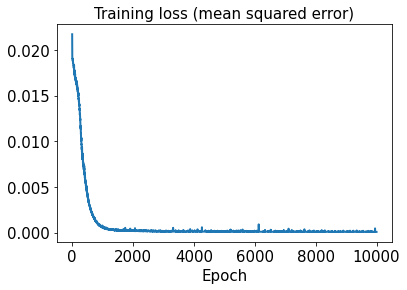

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

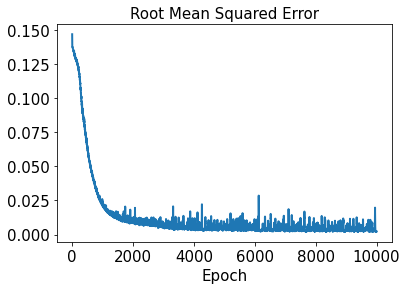

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.00019447003


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.0059252596


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

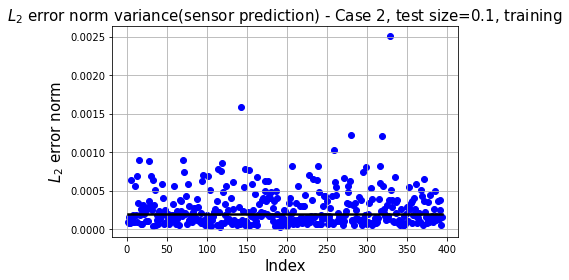

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

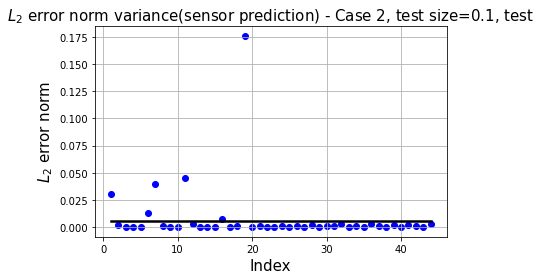

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/10000
13/13 [==============================] - 1s 17ms/step - loss: 0.0110 - rmse: 0.1040
Epoch 2/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.1032
Epoch 3/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.1018
Epoch 4/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0979
Epoch 5/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0894
Epoch 6/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0848
Epoch 7/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0833
Epoch 8/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0820
Epoch 9/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0798
Epoch 10/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0771
Epoch 11/10000
13/13 [======

13/13 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0314
Epoch 85/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 86/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0307
Epoch 87/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0304
Epoch 88/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0299
Epoch 89/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0297
Epoch 90/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0293
Epoch 91/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0289
Epoch 92/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.8295e-04 - rmse: 0.0286
Epoch 93/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.5848e-04 - rmse: 0.0282
Epoch 94/10000
13/13 [=====

13/13 [==============================] - 0s 5ms/step - loss: 3.7813e-04 - rmse: 0.0146
Epoch 165/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7447e-04 - rmse: 0.0145
Epoch 166/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7047e-04 - rmse: 0.0144
Epoch 167/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6871e-04 - rmse: 0.0143
Epoch 168/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6506e-04 - rmse: 0.0142
Epoch 169/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6315e-04 - rmse: 0.0141
Epoch 170/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5967e-04 - rmse: 0.0140
Epoch 171/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5638e-04 - rmse: 0.0139
Epoch 172/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5412e-04 - rmse: 0.0138
Epoch 173/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5195e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 2.4499e-04 - rmse: 0.0094
Epoch 244/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4393e-04 - rmse: 0.0093
Epoch 245/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4360e-04 - rmse: 0.0093
Epoch 246/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4223e-04 - rmse: 0.0093
Epoch 247/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4285e-04 - rmse: 0.0093
Epoch 248/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4140e-04 - rmse: 0.0092
Epoch 249/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3984e-04 - rmse: 0.0091
Epoch 250/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3941e-04 - rmse: 0.0091
Epoch 251/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3826e-04 - rmse: 0.0091
Epoch 252/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3688e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.9548e-04 - rmse: 0.0069
Epoch 323/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9472e-04 - rmse: 0.0069
Epoch 324/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9466e-04 - rmse: 0.0069
Epoch 325/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9595e-04 - rmse: 0.0070
Epoch 326/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9445e-04 - rmse: 0.0069
Epoch 327/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9335e-04 - rmse: 0.0068
Epoch 328/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9359e-04 - rmse: 0.0068
Epoch 329/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9273e-04 - rmse: 0.0068
Epoch 330/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9217e-04 - rmse: 0.0067
Epoch 331/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9167e-04 -

13/13 [==============================] - 0s 6ms/step - loss: 1.6745e-04 - rmse: 0.0055
Epoch 402/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6715e-04 - rmse: 0.0055
Epoch 403/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6670e-04 - rmse: 0.0054
Epoch 404/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6633e-04 - rmse: 0.0054
Epoch 405/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6596e-04 - rmse: 0.0054
Epoch 406/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6567e-04 - rmse: 0.0054
Epoch 407/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6549e-04 - rmse: 0.0054
Epoch 408/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6626e-04 - rmse: 0.0055
Epoch 409/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6507e-04 - rmse: 0.0054
Epoch 410/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6512e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.4752e-04 - rmse: 0.0046
Epoch 481/10000
13/13 [==============================] - 0s 6ms/step - loss: 1.4712e-04 - rmse: 0.0045
Epoch 482/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4703e-04 - rmse: 0.0045
Epoch 483/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4682e-04 - rmse: 0.0045
Epoch 484/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4685e-04 - rmse: 0.0045
Epoch 485/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4658e-04 - rmse: 0.0045
Epoch 486/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4633e-04 - rmse: 0.0045
Epoch 487/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4612e-04 - rmse: 0.0045
Epoch 488/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4575e-04 - rmse: 0.0045
Epoch 489/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4572e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.3206e-04 - rmse: 0.0040
Epoch 560/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3197e-04 - rmse: 0.0040
Epoch 561/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3181e-04 - rmse: 0.0040
Epoch 562/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3177e-04 - rmse: 0.0040
Epoch 563/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3195e-04 - rmse: 0.0040
Epoch 564/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3141e-04 - rmse: 0.0039
Epoch 565/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3112e-04 - rmse: 0.0039
Epoch 566/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3127e-04 - rmse: 0.0040
Epoch 567/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3137e-04 - rmse: 0.0040
Epoch 568/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.3085e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.1985e-04 - rmse: 0.0036
Epoch 639/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1952e-04 - rmse: 0.0036
Epoch 640/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1927e-04 - rmse: 0.0036
Epoch 641/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1921e-04 - rmse: 0.0036
Epoch 642/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1892e-04 - rmse: 0.0035
Epoch 643/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1884e-04 - rmse: 0.0035
Epoch 644/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1860e-04 - rmse: 0.0035
Epoch 645/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1855e-04 - rmse: 0.0035
Epoch 646/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1852e-04 - rmse: 0.0035
Epoch 647/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1845e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.0931e-04 - rmse: 0.0033
Epoch 718/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0898e-04 - rmse: 0.0033
Epoch 719/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0914e-04 - rmse: 0.0033
Epoch 720/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0949e-04 - rmse: 0.0034
Epoch 721/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0931e-04 - rmse: 0.0034
Epoch 722/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0863e-04 - rmse: 0.0033
Epoch 723/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0835e-04 - rmse: 0.0033
Epoch 724/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0812e-04 - rmse: 0.0033
Epoch 725/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0801e-04 - rmse: 0.0033
Epoch 726/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0816e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 9.9999e-05 - rmse: 0.0031
Epoch 797/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0012e-04 - rmse: 0.0031
Epoch 798/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9761e-05 - rmse: 0.0031
Epoch 799/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9654e-05 - rmse: 0.0031
Epoch 800/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9607e-05 - rmse: 0.0031
Epoch 801/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9534e-05 - rmse: 0.0031
Epoch 802/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9728e-05 - rmse: 0.0031
Epoch 803/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9421e-05 - rmse: 0.0031
Epoch 804/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9343e-05 - rmse: 0.0031
Epoch 805/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9290e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 9.2381e-05 - rmse: 0.0030
Epoch 876/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.2127e-05 - rmse: 0.0029
Epoch 877/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.2011e-05 - rmse: 0.0029
Epoch 878/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.2027e-05 - rmse: 0.0029
Epoch 879/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1888e-05 - rmse: 0.0029
Epoch 880/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1807e-05 - rmse: 0.0029
Epoch 881/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1625e-05 - rmse: 0.0029
Epoch 882/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1375e-05 - rmse: 0.0029
Epoch 883/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1267e-05 - rmse: 0.0029
Epoch 884/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.1337e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 8.5428e-05 - rmse: 0.0028
Epoch 955/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.5217e-05 - rmse: 0.0028
Epoch 956/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.5350e-05 - rmse: 0.0028
Epoch 957/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.5175e-05 - rmse: 0.0028
Epoch 958/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.5054e-05 - rmse: 0.0028
Epoch 959/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4951e-05 - rmse: 0.0028
Epoch 960/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4989e-05 - rmse: 0.0028
Epoch 961/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.5116e-05 - rmse: 0.0028
Epoch 962/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4770e-05 - rmse: 0.0028
Epoch 963/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.4565e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 7.9329e-05 - rmse: 0.0026
Epoch 1034/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.9152e-05 - rmse: 0.0026
Epoch 1035/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.9207e-05 - rmse: 0.0026
Epoch 1036/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.9153e-05 - rmse: 0.0026
Epoch 1037/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.9166e-05 - rmse: 0.0027
Epoch 1038/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.9156e-05 - rmse: 0.0027
Epoch 1039/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8946e-05 - rmse: 0.0026
Epoch 1040/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8861e-05 - rmse: 0.0026
Epoch 1041/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8736e-05 - rmse: 0.0026
Epoch 1042/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.8

13/13 [==============================] - 0s 5ms/step - loss: 7.4900e-05 - rmse: 0.0027
Epoch 1112/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.4454e-05 - rmse: 0.0026
Epoch 1113/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.4173e-05 - rmse: 0.0026
Epoch 1114/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.4116e-05 - rmse: 0.0026
Epoch 1115/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3971e-05 - rmse: 0.0025
Epoch 1116/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.4030e-05 - rmse: 0.0026
Epoch 1117/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.4256e-05 - rmse: 0.0026
Epoch 1118/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.4110e-05 - rmse: 0.0026
Epoch 1119/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3794e-05 - rmse: 0.0025
Epoch 1120/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.3

13/13 [==============================] - 0s 5ms/step - loss: 6.9949e-05 - rmse: 0.0025
Epoch 1190/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.0276e-05 - rmse: 0.0026
Epoch 1191/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.0122e-05 - rmse: 0.0026
Epoch 1192/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.0117e-05 - rmse: 0.0026
Epoch 1193/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.0195e-05 - rmse: 0.0026
Epoch 1194/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9749e-05 - rmse: 0.0025
Epoch 1195/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9544e-05 - rmse: 0.0025
Epoch 1196/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9635e-05 - rmse: 0.0025
Epoch 1197/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9740e-05 - rmse: 0.0025
Epoch 1198/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.9

13/13 [==============================] - 0s 5ms/step - loss: 6.5930e-05 - rmse: 0.0024
Epoch 1268/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5778e-05 - rmse: 0.0024
Epoch 1269/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.6085e-05 - rmse: 0.0025
Epoch 1270/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5770e-05 - rmse: 0.0024
Epoch 1271/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5787e-05 - rmse: 0.0024
Epoch 1272/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5709e-05 - rmse: 0.0024
Epoch 1273/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5691e-05 - rmse: 0.0024
Epoch 1274/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5495e-05 - rmse: 0.0024
Epoch 1275/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5408e-05 - rmse: 0.0024
Epoch 1276/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.5

13/13 [==============================] - 0s 5ms/step - loss: 6.2489e-05 - rmse: 0.0024
Epoch 1346/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2391e-05 - rmse: 0.0024
Epoch 1347/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2419e-05 - rmse: 0.0024
Epoch 1348/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2356e-05 - rmse: 0.0024
Epoch 1349/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2284e-05 - rmse: 0.0024
Epoch 1350/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2238e-05 - rmse: 0.0024
Epoch 1351/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2223e-05 - rmse: 0.0024
Epoch 1352/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2236e-05 - rmse: 0.0024
Epoch 1353/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2189e-05 - rmse: 0.0024
Epoch 1354/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2

13/13 [==============================] - 0s 5ms/step - loss: 5.8992e-05 - rmse: 0.0022
Epoch 1424/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9056e-05 - rmse: 0.0023
Epoch 1425/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9051e-05 - rmse: 0.0023
Epoch 1426/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9112e-05 - rmse: 0.0023
Epoch 1427/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9090e-05 - rmse: 0.0023
Epoch 1428/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9059e-05 - rmse: 0.0023
Epoch 1429/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8928e-05 - rmse: 0.0023
Epoch 1430/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8911e-05 - rmse: 0.0023
Epoch 1431/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9152e-05 - rmse: 0.0023
Epoch 1432/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.8

13/13 [==============================] - 0s 5ms/step - loss: 5.7476e-05 - rmse: 0.0025
Epoch 1502/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7902e-05 - rmse: 0.0026
Epoch 1503/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7311e-05 - rmse: 0.0025
Epoch 1504/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7354e-05 - rmse: 0.0025
Epoch 1505/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7154e-05 - rmse: 0.0024
Epoch 1506/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7032e-05 - rmse: 0.0024
Epoch 1507/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6600e-05 - rmse: 0.0023
Epoch 1508/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6266e-05 - rmse: 0.0023
Epoch 1509/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.5970e-05 - rmse: 0.0022
Epoch 1510/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6

13/13 [==============================] - 0s 5ms/step - loss: 5.5268e-05 - rmse: 0.0025
Epoch 1580/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.4823e-05 - rmse: 0.0024
Epoch 1581/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.4654e-05 - rmse: 0.0024
Epoch 1582/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.4252e-05 - rmse: 0.0023
Epoch 1583/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3861e-05 - rmse: 0.0022
Epoch 1584/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3715e-05 - rmse: 0.0022
Epoch 1585/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3646e-05 - rmse: 0.0022
Epoch 1586/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3614e-05 - rmse: 0.0022
Epoch 1587/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3633e-05 - rmse: 0.0022
Epoch 1588/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3

13/13 [==============================] - 0s 5ms/step - loss: 5.1668e-05 - rmse: 0.0022
Epoch 1658/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1586e-05 - rmse: 0.0022
Epoch 1659/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1604e-05 - rmse: 0.0022
Epoch 1660/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1397e-05 - rmse: 0.0021
Epoch 1661/10000
13/13 [==============================] - 0s 6ms/step - loss: 5.1460e-05 - rmse: 0.0021
Epoch 1662/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1582e-05 - rmse: 0.0022
Epoch 1663/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1911e-05 - rmse: 0.0023
Epoch 1664/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1822e-05 - rmse: 0.0022
Epoch 1665/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1773e-05 - rmse: 0.0022
Epoch 1666/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2

13/13 [==============================] - 0s 5ms/step - loss: 4.9479e-05 - rmse: 0.0021
Epoch 1736/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9576e-05 - rmse: 0.0021
Epoch 1737/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9464e-05 - rmse: 0.0021
Epoch 1738/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9343e-05 - rmse: 0.0021
Epoch 1739/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9261e-05 - rmse: 0.0021
Epoch 1740/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9188e-05 - rmse: 0.0021
Epoch 1741/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9280e-05 - rmse: 0.0021
Epoch 1742/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9320e-05 - rmse: 0.0021
Epoch 1743/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9320e-05 - rmse: 0.0021
Epoch 1744/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9

13/13 [==============================] - 0s 5ms/step - loss: 4.7681e-05 - rmse: 0.0021
Epoch 1814/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7747e-05 - rmse: 0.0021
Epoch 1815/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7848e-05 - rmse: 0.0021
Epoch 1816/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7865e-05 - rmse: 0.0021
Epoch 1817/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8215e-05 - rmse: 0.0022
Epoch 1818/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8327e-05 - rmse: 0.0023
Epoch 1819/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8851e-05 - rmse: 0.0024
Epoch 1820/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8692e-05 - rmse: 0.0023
Epoch 1821/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9016e-05 - rmse: 0.0024
Epoch 1822/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8

13/13 [==============================] - 0s 5ms/step - loss: 4.5975e-05 - rmse: 0.0020
Epoch 1892/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5872e-05 - rmse: 0.0020
Epoch 1893/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5831e-05 - rmse: 0.0020
Epoch 1894/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5803e-05 - rmse: 0.0020
Epoch 1895/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5810e-05 - rmse: 0.0020
Epoch 1896/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5872e-05 - rmse: 0.0020
Epoch 1897/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5821e-05 - rmse: 0.0020
Epoch 1898/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5834e-05 - rmse: 0.0020
Epoch 1899/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5786e-05 - rmse: 0.0020
Epoch 1900/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5

13/13 [==============================] - 0s 5ms/step - loss: 4.4360e-05 - rmse: 0.0020
Epoch 1970/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4301e-05 - rmse: 0.0020
Epoch 1971/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4227e-05 - rmse: 0.0020
Epoch 1972/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4327e-05 - rmse: 0.0020
Epoch 1973/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4478e-05 - rmse: 0.0020
Epoch 1974/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4668e-05 - rmse: 0.0021
Epoch 1975/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4701e-05 - rmse: 0.0021
Epoch 1976/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4725e-05 - rmse: 0.0021
Epoch 1977/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4458e-05 - rmse: 0.0020
Epoch 1978/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4

13/13 [==============================] - 0s 5ms/step - loss: 4.3378e-05 - rmse: 0.0021
Epoch 2048/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3634e-05 - rmse: 0.0021
Epoch 2049/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3586e-05 - rmse: 0.0021
Epoch 2050/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3208e-05 - rmse: 0.0020
Epoch 2051/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3072e-05 - rmse: 0.0020
Epoch 2052/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2962e-05 - rmse: 0.0020
Epoch 2053/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3521e-05 - rmse: 0.0021
Epoch 2054/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3311e-05 - rmse: 0.0021
Epoch 2055/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3024e-05 - rmse: 0.0020
Epoch 2056/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.3

13/13 [==============================] - 0s 5ms/step - loss: 4.1925e-05 - rmse: 0.0020
Epoch 2126/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1908e-05 - rmse: 0.0020
Epoch 2127/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2013e-05 - rmse: 0.0020
Epoch 2128/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1894e-05 - rmse: 0.0020
Epoch 2129/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1866e-05 - rmse: 0.0020
Epoch 2130/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1642e-05 - rmse: 0.0019
Epoch 2131/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1624e-05 - rmse: 0.0019
Epoch 2132/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1676e-05 - rmse: 0.0019
Epoch 2133/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1696e-05 - rmse: 0.0020
Epoch 2134/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1

13/13 [==============================] - 0s 5ms/step - loss: 4.0930e-05 - rmse: 0.0020
Epoch 2204/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1448e-05 - rmse: 0.0021
Epoch 2205/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1128e-05 - rmse: 0.0021
Epoch 2206/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0851e-05 - rmse: 0.0020
Epoch 2207/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0819e-05 - rmse: 0.0020
Epoch 2208/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0614e-05 - rmse: 0.0019
Epoch 2209/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0611e-05 - rmse: 0.0019
Epoch 2210/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0580e-05 - rmse: 0.0019
Epoch 2211/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0907e-05 - rmse: 0.0020
Epoch 2212/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0

13/13 [==============================] - 0s 5ms/step - loss: 3.9566e-05 - rmse: 0.0019
Epoch 2282/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9674e-05 - rmse: 0.0019
Epoch 2283/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9773e-05 - rmse: 0.0020
Epoch 2284/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9784e-05 - rmse: 0.0020
Epoch 2285/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9624e-05 - rmse: 0.0019
Epoch 2286/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9303e-05 - rmse: 0.0018
Epoch 2287/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9289e-05 - rmse: 0.0018
Epoch 2288/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9419e-05 - rmse: 0.0019
Epoch 2289/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9257e-05 - rmse: 0.0018
Epoch 2290/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9

13/13 [==============================] - 0s 5ms/step - loss: 3.8581e-05 - rmse: 0.0019
Epoch 2360/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8618e-05 - rmse: 0.0019
Epoch 2361/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8546e-05 - rmse: 0.0019
Epoch 2362/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8606e-05 - rmse: 0.0019
Epoch 2363/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9144e-05 - rmse: 0.0020
Epoch 2364/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9478e-05 - rmse: 0.0021
Epoch 2365/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8992e-05 - rmse: 0.0020
Epoch 2366/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8866e-05 - rmse: 0.0020
Epoch 2367/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8856e-05 - rmse: 0.0020
Epoch 2368/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8

13/13 [==============================] - 0s 5ms/step - loss: 3.7558e-05 - rmse: 0.0018
Epoch 2438/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7585e-05 - rmse: 0.0018
Epoch 2439/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7462e-05 - rmse: 0.0018
Epoch 2440/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7551e-05 - rmse: 0.0018
Epoch 2441/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7540e-05 - rmse: 0.0018
Epoch 2442/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7512e-05 - rmse: 0.0018
Epoch 2443/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7343e-05 - rmse: 0.0018
Epoch 2444/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7300e-05 - rmse: 0.0018
Epoch 2445/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7445e-05 - rmse: 0.0018
Epoch 2446/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7

13/13 [==============================] - 0s 5ms/step - loss: 3.8246e-05 - rmse: 0.0022
Epoch 2516/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7957e-05 - rmse: 0.0021
Epoch 2517/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7120e-05 - rmse: 0.0019
Epoch 2518/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6801e-05 - rmse: 0.0018
Epoch 2519/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6749e-05 - rmse: 0.0018
Epoch 2520/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6738e-05 - rmse: 0.0018
Epoch 2521/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6945e-05 - rmse: 0.0019
Epoch 2522/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6812e-05 - rmse: 0.0018
Epoch 2523/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6751e-05 - rmse: 0.0018
Epoch 2524/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6

13/13 [==============================] - 0s 5ms/step - loss: 3.6083e-05 - rmse: 0.0018
Epoch 2594/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6077e-05 - rmse: 0.0018
Epoch 2595/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6061e-05 - rmse: 0.0018
Epoch 2596/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5999e-05 - rmse: 0.0018
Epoch 2597/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6251e-05 - rmse: 0.0019
Epoch 2598/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6060e-05 - rmse: 0.0018
Epoch 2599/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6047e-05 - rmse: 0.0018
Epoch 2600/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6007e-05 - rmse: 0.0018
Epoch 2601/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5912e-05 - rmse: 0.0018
Epoch 2602/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5

13/13 [==============================] - 0s 5ms/step - loss: 3.5337e-05 - rmse: 0.0018
Epoch 2672/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5285e-05 - rmse: 0.0018
Epoch 2673/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5377e-05 - rmse: 0.0018
Epoch 2674/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5317e-05 - rmse: 0.0018
Epoch 2675/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5355e-05 - rmse: 0.0018
Epoch 2676/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5412e-05 - rmse: 0.0018
Epoch 2677/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5214e-05 - rmse: 0.0018
Epoch 2678/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5226e-05 - rmse: 0.0018
Epoch 2679/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5404e-05 - rmse: 0.0018
Epoch 2680/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5

13/13 [==============================] - 0s 5ms/step - loss: 3.5478e-05 - rmse: 0.0020
Epoch 2750/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5278e-05 - rmse: 0.0019
Epoch 2751/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4797e-05 - rmse: 0.0018
Epoch 2752/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4802e-05 - rmse: 0.0018
Epoch 2753/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4663e-05 - rmse: 0.0018
Epoch 2754/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4548e-05 - rmse: 0.0017
Epoch 2755/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4653e-05 - rmse: 0.0018
Epoch 2756/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4740e-05 - rmse: 0.0018
Epoch 2757/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4643e-05 - rmse: 0.0018
Epoch 2758/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4

13/13 [==============================] - 0s 5ms/step - loss: 3.4137e-05 - rmse: 0.0018
Epoch 2828/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4328e-05 - rmse: 0.0018
Epoch 2829/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4147e-05 - rmse: 0.0018
Epoch 2830/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4249e-05 - rmse: 0.0018
Epoch 2831/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4662e-05 - rmse: 0.0019
Epoch 2832/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4919e-05 - rmse: 0.0020
Epoch 2833/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4635e-05 - rmse: 0.0019
Epoch 2834/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4242e-05 - rmse: 0.0018
Epoch 2835/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4162e-05 - rmse: 0.0018
Epoch 2836/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4

13/13 [==============================] - 0s 5ms/step - loss: 3.3545e-05 - rmse: 0.0018
Epoch 2906/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3669e-05 - rmse: 0.0018
Epoch 2907/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3508e-05 - rmse: 0.0018
Epoch 2908/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3486e-05 - rmse: 0.0018
Epoch 2909/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3574e-05 - rmse: 0.0018
Epoch 2910/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3712e-05 - rmse: 0.0018
Epoch 2911/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3590e-05 - rmse: 0.0018
Epoch 2912/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3911e-05 - rmse: 0.0019
Epoch 2913/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3856e-05 - rmse: 0.0019
Epoch 2914/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3

13/13 [==============================] - 0s 5ms/step - loss: 3.3075e-05 - rmse: 0.0018
Epoch 2984/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3004e-05 - rmse: 0.0018
Epoch 2985/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2917e-05 - rmse: 0.0017
Epoch 2986/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2961e-05 - rmse: 0.0017
Epoch 2987/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2985e-05 - rmse: 0.0018
Epoch 2988/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3175e-05 - rmse: 0.0018
Epoch 2989/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3130e-05 - rmse: 0.0018
Epoch 2990/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3016e-05 - rmse: 0.0018
Epoch 2991/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2974e-05 - rmse: 0.0018
Epoch 2992/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3

13/13 [==============================] - 0s 5ms/step - loss: 3.2329e-05 - rmse: 0.0017
Epoch 3062/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2310e-05 - rmse: 0.0017
Epoch 3063/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2350e-05 - rmse: 0.0017
Epoch 3064/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2827e-05 - rmse: 0.0018
Epoch 3065/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2690e-05 - rmse: 0.0018
Epoch 3066/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2653e-05 - rmse: 0.0018
Epoch 3067/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2713e-05 - rmse: 0.0018
Epoch 3068/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2925e-05 - rmse: 0.0019
Epoch 3069/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2684e-05 - rmse: 0.0018
Epoch 3070/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2

13/13 [==============================] - 0s 5ms/step - loss: 3.2209e-05 - rmse: 0.0018
Epoch 3140/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2126e-05 - rmse: 0.0018
Epoch 3141/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2052e-05 - rmse: 0.0017
Epoch 3142/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1892e-05 - rmse: 0.0017
Epoch 3143/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1903e-05 - rmse: 0.0017
Epoch 3144/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1876e-05 - rmse: 0.0017
Epoch 3145/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1965e-05 - rmse: 0.0017
Epoch 3146/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2089e-05 - rmse: 0.0018
Epoch 3147/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2721e-05 - rmse: 0.0019
Epoch 3148/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4

13/13 [==============================] - 0s 5ms/step - loss: 3.1562e-05 - rmse: 0.0017
Epoch 3218/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1732e-05 - rmse: 0.0018
Epoch 3219/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2213e-05 - rmse: 0.0019
Epoch 3220/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2107e-05 - rmse: 0.0019
Epoch 3221/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2133e-05 - rmse: 0.0019
Epoch 3222/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1872e-05 - rmse: 0.0018
Epoch 3223/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1593e-05 - rmse: 0.0017
Epoch 3224/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1540e-05 - rmse: 0.0017
Epoch 3225/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1444e-05 - rmse: 0.0017
Epoch 3226/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1

13/13 [==============================] - 0s 5ms/step - loss: 3.1150e-05 - rmse: 0.0017
Epoch 3296/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1255e-05 - rmse: 0.0017
Epoch 3297/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1260e-05 - rmse: 0.0017
Epoch 3298/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1370e-05 - rmse: 0.0018
Epoch 3299/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1319e-05 - rmse: 0.0018
Epoch 3300/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1414e-05 - rmse: 0.0018
Epoch 3301/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1458e-05 - rmse: 0.0018
Epoch 3302/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1393e-05 - rmse: 0.0018
Epoch 3303/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1355e-05 - rmse: 0.0018
Epoch 3304/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1

13/13 [==============================] - 0s 5ms/step - loss: 3.1169e-05 - rmse: 0.0018
Epoch 3374/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0765e-05 - rmse: 0.0017
Epoch 3375/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0841e-05 - rmse: 0.0017
Epoch 3376/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0826e-05 - rmse: 0.0017
Epoch 3377/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0744e-05 - rmse: 0.0017
Epoch 3378/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0891e-05 - rmse: 0.0018
Epoch 3379/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0707e-05 - rmse: 0.0017
Epoch 3380/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0649e-05 - rmse: 0.0017
Epoch 3381/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0621e-05 - rmse: 0.0017
Epoch 3382/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0

13/13 [==============================] - 0s 5ms/step - loss: 3.0423e-05 - rmse: 0.0017
Epoch 3452/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0257e-05 - rmse: 0.0017
Epoch 3453/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0218e-05 - rmse: 0.0016
Epoch 3454/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0326e-05 - rmse: 0.0017
Epoch 3455/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0378e-05 - rmse: 0.0017
Epoch 3456/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0341e-05 - rmse: 0.0017
Epoch 3457/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0315e-05 - rmse: 0.0017
Epoch 3458/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0259e-05 - rmse: 0.0017
Epoch 3459/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0283e-05 - rmse: 0.0017
Epoch 3460/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0

13/13 [==============================] - 0s 5ms/step - loss: 2.9787e-05 - rmse: 0.0016
Epoch 3530/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9703e-05 - rmse: 0.0016
Epoch 3531/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9822e-05 - rmse: 0.0016
Epoch 3532/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0025e-05 - rmse: 0.0017
Epoch 3533/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0062e-05 - rmse: 0.0017
Epoch 3534/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9824e-05 - rmse: 0.0016
Epoch 3535/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9974e-05 - rmse: 0.0017
Epoch 3536/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9997e-05 - rmse: 0.0017
Epoch 3537/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0018e-05 - rmse: 0.0017
Epoch 3538/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.9570e-05 - rmse: 0.0016
Epoch 3608/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9682e-05 - rmse: 0.0017
Epoch 3609/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9684e-05 - rmse: 0.0017
Epoch 3610/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0067e-05 - rmse: 0.0018
Epoch 3611/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9867e-05 - rmse: 0.0017
Epoch 3612/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9706e-05 - rmse: 0.0017
Epoch 3613/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9584e-05 - rmse: 0.0016
Epoch 3614/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9428e-05 - rmse: 0.0016
Epoch 3615/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9470e-05 - rmse: 0.0016
Epoch 3616/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.9435e-05 - rmse: 0.0017
Epoch 3686/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9275e-05 - rmse: 0.0016
Epoch 3687/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9433e-05 - rmse: 0.0017
Epoch 3688/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9279e-05 - rmse: 0.0016
Epoch 3689/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9201e-05 - rmse: 0.0016
Epoch 3690/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9197e-05 - rmse: 0.0016
Epoch 3691/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9175e-05 - rmse: 0.0016
Epoch 3692/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9808e-05 - rmse: 0.0018
Epoch 3693/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9496e-05 - rmse: 0.0017
Epoch 3694/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.9325e-05 - rmse: 0.0017
Epoch 3764/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9312e-05 - rmse: 0.0017
Epoch 3765/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9456e-05 - rmse: 0.0018
Epoch 3766/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9267e-05 - rmse: 0.0017
Epoch 3767/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9254e-05 - rmse: 0.0017
Epoch 3768/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9321e-05 - rmse: 0.0017
Epoch 3769/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9642e-05 - rmse: 0.0018
Epoch 3770/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9232e-05 - rmse: 0.0017
Epoch 3771/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9042e-05 - rmse: 0.0017
Epoch 3772/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.8597e-05 - rmse: 0.0016
Epoch 3842/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8726e-05 - rmse: 0.0016
Epoch 3843/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8808e-05 - rmse: 0.0017
Epoch 3844/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8541e-05 - rmse: 0.0016
Epoch 3845/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8727e-05 - rmse: 0.0016
Epoch 3846/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8584e-05 - rmse: 0.0016
Epoch 3847/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8765e-05 - rmse: 0.0017
Epoch 3848/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8735e-05 - rmse: 0.0016
Epoch 3849/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8809e-05 - rmse: 0.0017
Epoch 3850/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.8605e-05 - rmse: 0.0017
Epoch 3920/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8535e-05 - rmse: 0.0017
Epoch 3921/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8517e-05 - rmse: 0.0016
Epoch 3922/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8484e-05 - rmse: 0.0016
Epoch 3923/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8520e-05 - rmse: 0.0017
Epoch 3924/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8501e-05 - rmse: 0.0016
Epoch 3925/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8443e-05 - rmse: 0.0016
Epoch 3926/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8384e-05 - rmse: 0.0016
Epoch 3927/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8337e-05 - rmse: 0.0016
Epoch 3928/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.8074e-05 - rmse: 0.0016
Epoch 3998/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8031e-05 - rmse: 0.0016
Epoch 3999/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8178e-05 - rmse: 0.0016
Epoch 4000/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8146e-05 - rmse: 0.0016
Epoch 4001/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8064e-05 - rmse: 0.0016
Epoch 4002/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8384e-05 - rmse: 0.0017
Epoch 4003/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8214e-05 - rmse: 0.0016
Epoch 4004/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8425e-05 - rmse: 0.0017
Epoch 4005/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8277e-05 - rmse: 0.0017
Epoch 4006/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.8127e-05 - rmse: 0.0017
Epoch 4076/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8083e-05 - rmse: 0.0017
Epoch 4077/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8174e-05 - rmse: 0.0017
Epoch 4078/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8158e-05 - rmse: 0.0017
Epoch 4079/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7984e-05 - rmse: 0.0016
Epoch 4080/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7976e-05 - rmse: 0.0016
Epoch 4081/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7992e-05 - rmse: 0.0016
Epoch 4082/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8190e-05 - rmse: 0.0017
Epoch 4083/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8135e-05 - rmse: 0.0017
Epoch 4084/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.8310e-05 - rmse: 0.0018
Epoch 4154/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8454e-05 - rmse: 0.0018
Epoch 4155/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9063e-05 - rmse: 0.0020
Epoch 4156/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8452e-05 - rmse: 0.0018
Epoch 4157/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8238e-05 - rmse: 0.0018
Epoch 4158/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7822e-05 - rmse: 0.0016
Epoch 4159/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7676e-05 - rmse: 0.0016
Epoch 4160/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7546e-05 - rmse: 0.0016
Epoch 4161/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7457e-05 - rmse: 0.0015
Epoch 4162/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.7564e-05 - rmse: 0.0016
Epoch 4232/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7314e-05 - rmse: 0.0015
Epoch 4233/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7175e-05 - rmse: 0.0015
Epoch 4234/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7124e-05 - rmse: 0.0015
Epoch 4235/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7220e-05 - rmse: 0.0015
Epoch 4236/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7244e-05 - rmse: 0.0015
Epoch 4237/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7325e-05 - rmse: 0.0016
Epoch 4238/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7404e-05 - rmse: 0.0016
Epoch 4239/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7203e-05 - rmse: 0.0015
Epoch 4240/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.7444e-05 - rmse: 0.0017
Epoch 4310/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7393e-05 - rmse: 0.0016
Epoch 4311/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7260e-05 - rmse: 0.0016
Epoch 4312/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7190e-05 - rmse: 0.0016
Epoch 4313/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7345e-05 - rmse: 0.0016
Epoch 4314/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7161e-05 - rmse: 0.0016
Epoch 4315/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7129e-05 - rmse: 0.0016
Epoch 4316/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7154e-05 - rmse: 0.0016
Epoch 4317/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7100e-05 - rmse: 0.0016
Epoch 4318/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.7144e-05 - rmse: 0.0016
Epoch 4388/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7115e-05 - rmse: 0.0016
Epoch 4389/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7078e-05 - rmse: 0.0016
Epoch 4390/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7202e-05 - rmse: 0.0016
Epoch 4391/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7171e-05 - rmse: 0.0016
Epoch 4392/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7000e-05 - rmse: 0.0016
Epoch 4393/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6982e-05 - rmse: 0.0016
Epoch 4394/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7191e-05 - rmse: 0.0016
Epoch 4395/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7083e-05 - rmse: 0.0016
Epoch 4396/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.6888e-05 - rmse: 0.0016
Epoch 4466/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6856e-05 - rmse: 0.0016
Epoch 4467/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6829e-05 - rmse: 0.0016
Epoch 4468/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6850e-05 - rmse: 0.0016
Epoch 4469/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6996e-05 - rmse: 0.0016
Epoch 4470/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6648e-05 - rmse: 0.0015
Epoch 4471/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6686e-05 - rmse: 0.0015
Epoch 4472/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6571e-05 - rmse: 0.0015
Epoch 4473/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6719e-05 - rmse: 0.0016
Epoch 4474/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6576e-05 - rmse: 0.0016
Epoch 4544/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6450e-05 - rmse: 0.0015
Epoch 4545/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6639e-05 - rmse: 0.0016
Epoch 4546/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6780e-05 - rmse: 0.0016
Epoch 4547/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6776e-05 - rmse: 0.0016
Epoch 4548/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6488e-05 - rmse: 0.0015
Epoch 4549/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6417e-05 - rmse: 0.0015
Epoch 4550/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6453e-05 - rmse: 0.0015
Epoch 4551/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6567e-05 - rmse: 0.0016
Epoch 4552/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.7036e-05 - rmse: 0.0017
Epoch 4622/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7351e-05 - rmse: 0.0018
Epoch 4623/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7038e-05 - rmse: 0.0017
Epoch 4624/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6609e-05 - rmse: 0.0016
Epoch 4625/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6418e-05 - rmse: 0.0016
Epoch 4626/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6290e-05 - rmse: 0.0015
Epoch 4627/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6279e-05 - rmse: 0.0015
Epoch 4628/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6253e-05 - rmse: 0.0015
Epoch 4629/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6229e-05 - rmse: 0.0015
Epoch 4630/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6281e-05 - rmse: 0.0016
Epoch 4700/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6546e-05 - rmse: 0.0016
Epoch 4701/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6678e-05 - rmse: 0.0017
Epoch 4702/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6391e-05 - rmse: 0.0016
Epoch 4703/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6315e-05 - rmse: 0.0016
Epoch 4704/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6372e-05 - rmse: 0.0016
Epoch 4705/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6341e-05 - rmse: 0.0016
Epoch 4706/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6567e-05 - rmse: 0.0017
Epoch 4707/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6675e-05 - rmse: 0.0017
Epoch 4708/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.7425e-05 - rmse: 0.0019
Epoch 4778/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6877e-05 - rmse: 0.0018
Epoch 4779/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6438e-05 - rmse: 0.0017
Epoch 4780/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6694e-05 - rmse: 0.0017
Epoch 4781/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6964e-05 - rmse: 0.0018
Epoch 4782/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6600e-05 - rmse: 0.0017
Epoch 4783/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6563e-05 - rmse: 0.0017
Epoch 4784/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6157e-05 - rmse: 0.0016
Epoch 4785/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5974e-05 - rmse: 0.0015
Epoch 4786/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5864e-05 - rmse: 0.0015
Epoch 4856/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5658e-05 - rmse: 0.0015
Epoch 4857/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5606e-05 - rmse: 0.0014
Epoch 4858/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5905e-05 - rmse: 0.0015
Epoch 4859/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5819e-05 - rmse: 0.0015
Epoch 4860/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5973e-05 - rmse: 0.0016
Epoch 4861/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5928e-05 - rmse: 0.0016
Epoch 4862/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5985e-05 - rmse: 0.0016
Epoch 4863/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6684e-05 - rmse: 0.0018
Epoch 4864/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.5609e-05 - rmse: 0.0015
Epoch 4934/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5668e-05 - rmse: 0.0015
Epoch 4935/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5778e-05 - rmse: 0.0016
Epoch 4936/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5797e-05 - rmse: 0.0016
Epoch 4937/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5745e-05 - rmse: 0.0015
Epoch 4938/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5781e-05 - rmse: 0.0016
Epoch 4939/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5811e-05 - rmse: 0.0016
Epoch 4940/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5767e-05 - rmse: 0.0015
Epoch 4941/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5714e-05 - rmse: 0.0015
Epoch 4942/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5712e-05 - rmse: 0.0016
Epoch 5012/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6551e-05 - rmse: 0.0018
Epoch 5013/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6550e-05 - rmse: 0.0018
Epoch 5014/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5930e-05 - rmse: 0.0016
Epoch 5015/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5686e-05 - rmse: 0.0016
Epoch 5016/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5670e-05 - rmse: 0.0016
Epoch 5017/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5723e-05 - rmse: 0.0016
Epoch 5018/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5717e-05 - rmse: 0.0016
Epoch 5019/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5785e-05 - rmse: 0.0016
Epoch 5020/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5635e-05 - rmse: 0.0016
Epoch 5090/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6062e-05 - rmse: 0.0017
Epoch 5091/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5837e-05 - rmse: 0.0017
Epoch 5092/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5668e-05 - rmse: 0.0016
Epoch 5093/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6199e-05 - rmse: 0.0018
Epoch 5094/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6050e-05 - rmse: 0.0017
Epoch 5095/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5440e-05 - rmse: 0.0015
Epoch 5096/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5314e-05 - rmse: 0.0015
Epoch 5097/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5272e-05 - rmse: 0.0015
Epoch 5098/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5100e-05 - rmse: 0.0015
Epoch 5168/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5026e-05 - rmse: 0.0014
Epoch 5169/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5115e-05 - rmse: 0.0015
Epoch 5170/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5187e-05 - rmse: 0.0015
Epoch 5171/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5247e-05 - rmse: 0.0015
Epoch 5172/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5237e-05 - rmse: 0.0015
Epoch 5173/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5592e-05 - rmse: 0.0016
Epoch 5174/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5528e-05 - rmse: 0.0016
Epoch 5175/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5353e-05 - rmse: 0.0016
Epoch 5176/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5392e-05 - rmse: 0.0016
Epoch 5246/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5344e-05 - rmse: 0.0016
Epoch 5247/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5347e-05 - rmse: 0.0016
Epoch 5248/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5069e-05 - rmse: 0.0015
Epoch 5249/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5048e-05 - rmse: 0.0015
Epoch 5250/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4927e-05 - rmse: 0.0015
Epoch 5251/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5011e-05 - rmse: 0.0015
Epoch 5252/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5179e-05 - rmse: 0.0015
Epoch 5253/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5341e-05 - rmse: 0.0016
Epoch 5254/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5076e-05 - rmse: 0.0015
Epoch 5324/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4966e-05 - rmse: 0.0015
Epoch 5325/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5259e-05 - rmse: 0.0016
Epoch 5326/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5110e-05 - rmse: 0.0016
Epoch 5327/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4957e-05 - rmse: 0.0015
Epoch 5328/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4882e-05 - rmse: 0.0015
Epoch 5329/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4764e-05 - rmse: 0.0014
Epoch 5330/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4810e-05 - rmse: 0.0015
Epoch 5331/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4773e-05 - rmse: 0.0014
Epoch 5332/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4837e-05 - rmse: 0.0015
Epoch 5402/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4693e-05 - rmse: 0.0015
Epoch 5403/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4741e-05 - rmse: 0.0015
Epoch 5404/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4793e-05 - rmse: 0.0015
Epoch 5405/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4835e-05 - rmse: 0.0015
Epoch 5406/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4902e-05 - rmse: 0.0015
Epoch 5407/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4687e-05 - rmse: 0.0015
Epoch 5408/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4651e-05 - rmse: 0.0014
Epoch 5409/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4733e-05 - rmse: 0.0015
Epoch 5410/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4786e-05 - rmse: 0.0015
Epoch 5480/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4627e-05 - rmse: 0.0015
Epoch 5481/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4607e-05 - rmse: 0.0015
Epoch 5482/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4753e-05 - rmse: 0.0015
Epoch 5483/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4748e-05 - rmse: 0.0015
Epoch 5484/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4585e-05 - rmse: 0.0015
Epoch 5485/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4513e-05 - rmse: 0.0014
Epoch 5486/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4657e-05 - rmse: 0.0015
Epoch 5487/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4611e-05 - rmse: 0.0015
Epoch 5488/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4740e-05 - rmse: 0.0015
Epoch 5558/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4637e-05 - rmse: 0.0015
Epoch 5559/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4493e-05 - rmse: 0.0015
Epoch 5560/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4681e-05 - rmse: 0.0015
Epoch 5561/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4998e-05 - rmse: 0.0016
Epoch 5562/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4702e-05 - rmse: 0.0015
Epoch 5563/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4638e-05 - rmse: 0.0015
Epoch 5564/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4511e-05 - rmse: 0.0015
Epoch 5565/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4632e-05 - rmse: 0.0015
Epoch 5566/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4414e-05 - rmse: 0.0015
Epoch 5636/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4323e-05 - rmse: 0.0014
Epoch 5637/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4400e-05 - rmse: 0.0015
Epoch 5638/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4436e-05 - rmse: 0.0015
Epoch 5639/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4582e-05 - rmse: 0.0015
Epoch 5640/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4587e-05 - rmse: 0.0015
Epoch 5641/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4577e-05 - rmse: 0.0015
Epoch 5642/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4666e-05 - rmse: 0.0016
Epoch 5643/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4498e-05 - rmse: 0.0015
Epoch 5644/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4582e-05 - rmse: 0.0016
Epoch 5714/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4847e-05 - rmse: 0.0016
Epoch 5715/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4593e-05 - rmse: 0.0016
Epoch 5716/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4400e-05 - rmse: 0.0015
Epoch 5717/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4298e-05 - rmse: 0.0015
Epoch 5718/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4125e-05 - rmse: 0.0014
Epoch 5719/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4049e-05 - rmse: 0.0014
Epoch 5720/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4226e-05 - rmse: 0.0014
Epoch 5721/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4227e-05 - rmse: 0.0014
Epoch 5722/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4740e-05 - rmse: 0.0016
Epoch 5792/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4424e-05 - rmse: 0.0015
Epoch 5793/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4164e-05 - rmse: 0.0015
Epoch 5794/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4292e-05 - rmse: 0.0015
Epoch 5795/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4357e-05 - rmse: 0.0015
Epoch 5796/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4563e-05 - rmse: 0.0016
Epoch 5797/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4652e-05 - rmse: 0.0016
Epoch 5798/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4486e-05 - rmse: 0.0016
Epoch 5799/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4273e-05 - rmse: 0.0015
Epoch 5800/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4245e-05 - rmse: 0.0015
Epoch 5870/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4141e-05 - rmse: 0.0015
Epoch 5871/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4102e-05 - rmse: 0.0015
Epoch 5872/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4214e-05 - rmse: 0.0015
Epoch 5873/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4347e-05 - rmse: 0.0016
Epoch 5874/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4264e-05 - rmse: 0.0015
Epoch 5875/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4898e-05 - rmse: 0.0017
Epoch 5876/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4413e-05 - rmse: 0.0016
Epoch 5877/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4626e-05 - rmse: 0.0016
Epoch 5878/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.3985e-05 - rmse: 0.0015
Epoch 5948/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4069e-05 - rmse: 0.0015
Epoch 5949/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3965e-05 - rmse: 0.0015
Epoch 5950/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4164e-05 - rmse: 0.0015
Epoch 5951/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4199e-05 - rmse: 0.0015
Epoch 5952/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4690e-05 - rmse: 0.0017
Epoch 5953/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4574e-05 - rmse: 0.0017
Epoch 5954/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4413e-05 - rmse: 0.0016
Epoch 5955/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4226e-05 - rmse: 0.0015
Epoch 5956/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.3820e-05 - rmse: 0.0014
Epoch 6026/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3902e-05 - rmse: 0.0015
Epoch 6027/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4273e-05 - rmse: 0.0016
Epoch 6028/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4117e-05 - rmse: 0.0015
Epoch 6029/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4125e-05 - rmse: 0.0015
Epoch 6030/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4067e-05 - rmse: 0.0015
Epoch 6031/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4039e-05 - rmse: 0.0015
Epoch 6032/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3909e-05 - rmse: 0.0015
Epoch 6033/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4227e-05 - rmse: 0.0016
Epoch 6034/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4818e-05 - rmse: 0.0018
Epoch 6104/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4289e-05 - rmse: 0.0016
Epoch 6105/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4041e-05 - rmse: 0.0015
Epoch 6106/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3809e-05 - rmse: 0.0015
Epoch 6107/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3894e-05 - rmse: 0.0015
Epoch 6108/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4183e-05 - rmse: 0.0016
Epoch 6109/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4089e-05 - rmse: 0.0016
Epoch 6110/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4381e-05 - rmse: 0.0017
Epoch 6111/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4167e-05 - rmse: 0.0016
Epoch 6112/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3619e-05 - rmse: 0.0014
Epoch 6182/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3574e-05 - rmse: 0.0014
Epoch 6183/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3500e-05 - rmse: 0.0014
Epoch 6184/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3670e-05 - rmse: 0.0015
Epoch 6185/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3631e-05 - rmse: 0.0014
Epoch 6186/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3679e-05 - rmse: 0.0015
Epoch 6187/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3765e-05 - rmse: 0.0015
Epoch 6188/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3919e-05 - rmse: 0.0015
Epoch 6189/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3765e-05 - rmse: 0.0015
Epoch 6190/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3385e-05 - rmse: 0.0014
Epoch 6260/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3374e-05 - rmse: 0.0014
Epoch 6261/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3298e-05 - rmse: 0.0014
Epoch 6262/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3396e-05 - rmse: 0.0014
Epoch 6263/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3562e-05 - rmse: 0.0015
Epoch 6264/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3480e-05 - rmse: 0.0014
Epoch 6265/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3532e-05 - rmse: 0.0014
Epoch 6266/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3594e-05 - rmse: 0.0015
Epoch 6267/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3621e-05 - rmse: 0.0015
Epoch 6268/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3628e-05 - rmse: 0.0015
Epoch 6338/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3518e-05 - rmse: 0.0015
Epoch 6339/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3561e-05 - rmse: 0.0015
Epoch 6340/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3457e-05 - rmse: 0.0014
Epoch 6341/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3486e-05 - rmse: 0.0015
Epoch 6342/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3745e-05 - rmse: 0.0015
Epoch 6343/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3693e-05 - rmse: 0.0015
Epoch 6344/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3627e-05 - rmse: 0.0015
Epoch 6345/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3454e-05 - rmse: 0.0014
Epoch 6346/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3229e-05 - rmse: 0.0014
Epoch 6416/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3306e-05 - rmse: 0.0014
Epoch 6417/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3335e-05 - rmse: 0.0014
Epoch 6418/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3505e-05 - rmse: 0.0015
Epoch 6419/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3402e-05 - rmse: 0.0015
Epoch 6420/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3501e-05 - rmse: 0.0015
Epoch 6421/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3558e-05 - rmse: 0.0015
Epoch 6422/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3376e-05 - rmse: 0.0014
Epoch 6423/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3386e-05 - rmse: 0.0015
Epoch 6424/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3592e-05 - rmse: 0.0015
Epoch 6494/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3663e-05 - rmse: 0.0016
Epoch 6495/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3902e-05 - rmse: 0.0016
Epoch 6496/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3523e-05 - rmse: 0.0015
Epoch 6497/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3299e-05 - rmse: 0.0014
Epoch 6498/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3168e-05 - rmse: 0.0014
Epoch 6499/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3616e-05 - rmse: 0.0016
Epoch 6500/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3724e-05 - rmse: 0.0016
Epoch 6501/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3579e-05 - rmse: 0.0015
Epoch 6502/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3136e-05 - rmse: 0.0014
Epoch 6572/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3200e-05 - rmse: 0.0014
Epoch 6573/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3193e-05 - rmse: 0.0014
Epoch 6574/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3178e-05 - rmse: 0.0014
Epoch 6575/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3120e-05 - rmse: 0.0014
Epoch 6576/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3104e-05 - rmse: 0.0014
Epoch 6577/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.3001e-05 - rmse: 0.0014
Epoch 6578/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3068e-05 - rmse: 0.0014
Epoch 6579/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3116e-05 - rmse: 0.0014
Epoch 6580/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.2916e-05 - rmse: 0.0014
Epoch 6650/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2944e-05 - rmse: 0.0014
Epoch 6651/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2906e-05 - rmse: 0.0014
Epoch 6652/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2929e-05 - rmse: 0.0014
Epoch 6653/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2914e-05 - rmse: 0.0014
Epoch 6654/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2941e-05 - rmse: 0.0014
Epoch 6655/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3032e-05 - rmse: 0.0014
Epoch 6656/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3087e-05 - rmse: 0.0014
Epoch 6657/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2989e-05 - rmse: 0.0014
Epoch 6658/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3076e-05 - rmse: 0.0015
Epoch 6728/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3105e-05 - rmse: 0.0015
Epoch 6729/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3035e-05 - rmse: 0.0014
Epoch 6730/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3340e-05 - rmse: 0.0015
Epoch 6731/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3397e-05 - rmse: 0.0016
Epoch 6732/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3170e-05 - rmse: 0.0015
Epoch 6733/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3477e-05 - rmse: 0.0016
Epoch 6734/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3082e-05 - rmse: 0.0015
Epoch 6735/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2913e-05 - rmse: 0.0014
Epoch 6736/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2923e-05 - rmse: 0.0014
Epoch 6806/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2974e-05 - rmse: 0.0014
Epoch 6807/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2990e-05 - rmse: 0.0015
Epoch 6808/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2996e-05 - rmse: 0.0015
Epoch 6809/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2848e-05 - rmse: 0.0014
Epoch 6810/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2772e-05 - rmse: 0.0014
Epoch 6811/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2722e-05 - rmse: 0.0014
Epoch 6812/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2703e-05 - rmse: 0.0014
Epoch 6813/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2874e-05 - rmse: 0.0014
Epoch 6814/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.3019e-05 - rmse: 0.0015
Epoch 6884/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3158e-05 - rmse: 0.0015
Epoch 6885/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3312e-05 - rmse: 0.0016
Epoch 6886/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3515e-05 - rmse: 0.0016
Epoch 6887/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3060e-05 - rmse: 0.0015
Epoch 6888/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3121e-05 - rmse: 0.0015
Epoch 6889/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3022e-05 - rmse: 0.0015
Epoch 6890/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3027e-05 - rmse: 0.0015
Epoch 6891/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2847e-05 - rmse: 0.0014
Epoch 6892/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2680e-05 - rmse: 0.0014
Epoch 6962/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2814e-05 - rmse: 0.0014
Epoch 6963/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3048e-05 - rmse: 0.0015
Epoch 6964/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3805e-05 - rmse: 0.0018
Epoch 6965/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3410e-05 - rmse: 0.0016
Epoch 6966/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3283e-05 - rmse: 0.0016
Epoch 6967/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2951e-05 - rmse: 0.0015
Epoch 6968/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2685e-05 - rmse: 0.0014
Epoch 6969/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2649e-05 - rmse: 0.0014
Epoch 6970/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2732e-05 - rmse: 0.0014
Epoch 7040/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2541e-05 - rmse: 0.0014
Epoch 7041/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2688e-05 - rmse: 0.0014
Epoch 7042/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2607e-05 - rmse: 0.0014
Epoch 7043/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2443e-05 - rmse: 0.0013
Epoch 7044/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2428e-05 - rmse: 0.0013
Epoch 7045/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2736e-05 - rmse: 0.0014
Epoch 7046/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2657e-05 - rmse: 0.0014
Epoch 7047/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2504e-05 - rmse: 0.0014
Epoch 7048/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2705e-05 - rmse: 0.0015
Epoch 7118/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2503e-05 - rmse: 0.0014
Epoch 7119/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2421e-05 - rmse: 0.0014
Epoch 7120/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2389e-05 - rmse: 0.0013
Epoch 7121/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2372e-05 - rmse: 0.0013
Epoch 7122/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2362e-05 - rmse: 0.0013
Epoch 7123/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2307e-05 - rmse: 0.0013
Epoch 7124/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2378e-05 - rmse: 0.0013
Epoch 7125/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2594e-05 - rmse: 0.0014
Epoch 7126/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2572e-05 - rmse: 0.0014
Epoch 7196/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2568e-05 - rmse: 0.0014
Epoch 7197/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2671e-05 - rmse: 0.0015
Epoch 7198/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2745e-05 - rmse: 0.0015
Epoch 7199/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2586e-05 - rmse: 0.0014
Epoch 7200/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2619e-05 - rmse: 0.0015
Epoch 7201/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2611e-05 - rmse: 0.0015
Epoch 7202/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2569e-05 - rmse: 0.0014
Epoch 7203/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2570e-05 - rmse: 0.0014
Epoch 7204/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2478e-05 - rmse: 0.0014
Epoch 7274/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2431e-05 - rmse: 0.0014
Epoch 7275/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2376e-05 - rmse: 0.0014
Epoch 7276/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2377e-05 - rmse: 0.0014
Epoch 7277/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2646e-05 - rmse: 0.0015
Epoch 7278/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2469e-05 - rmse: 0.0014
Epoch 7279/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2327e-05 - rmse: 0.0014
Epoch 7280/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2595e-05 - rmse: 0.0015
Epoch 7281/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2940e-05 - rmse: 0.0016
Epoch 7282/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2342e-05 - rmse: 0.0014
Epoch 7352/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2718e-05 - rmse: 0.0015
Epoch 7353/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2637e-05 - rmse: 0.0015
Epoch 7354/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2656e-05 - rmse: 0.0015
Epoch 7355/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2401e-05 - rmse: 0.0014
Epoch 7356/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2360e-05 - rmse: 0.0014
Epoch 7357/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2230e-05 - rmse: 0.0014
Epoch 7358/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2125e-05 - rmse: 0.0013
Epoch 7359/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2151e-05 - rmse: 0.0013
Epoch 7360/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2461e-05 - rmse: 0.0015
Epoch 7430/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2154e-05 - rmse: 0.0014
Epoch 7431/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2038e-05 - rmse: 0.0013
Epoch 7432/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2029e-05 - rmse: 0.0013
Epoch 7433/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1978e-05 - rmse: 0.0013
Epoch 7434/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2153e-05 - rmse: 0.0014
Epoch 7435/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2349e-05 - rmse: 0.0014
Epoch 7436/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2220e-05 - rmse: 0.0014
Epoch 7437/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2093e-05 - rmse: 0.0013
Epoch 7438/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.2974e-05 - rmse: 0.0017
Epoch 7508/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2626e-05 - rmse: 0.0015
Epoch 7509/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2544e-05 - rmse: 0.0015
Epoch 7510/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2386e-05 - rmse: 0.0015
Epoch 7511/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2274e-05 - rmse: 0.0014
Epoch 7512/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2079e-05 - rmse: 0.0014
Epoch 7513/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2045e-05 - rmse: 0.0013
Epoch 7514/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2073e-05 - rmse: 0.0014
Epoch 7515/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2007e-05 - rmse: 0.0013
Epoch 7516/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1825e-05 - rmse: 0.0013
Epoch 7586/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1882e-05 - rmse: 0.0013
Epoch 7587/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1952e-05 - rmse: 0.0013
Epoch 7588/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2052e-05 - rmse: 0.0014
Epoch 7589/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1942e-05 - rmse: 0.0013
Epoch 7590/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1910e-05 - rmse: 0.0013
Epoch 7591/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1873e-05 - rmse: 0.0013
Epoch 7592/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1897e-05 - rmse: 0.0013
Epoch 7593/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1883e-05 - rmse: 0.0013
Epoch 7594/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1989e-05 - rmse: 0.0014
Epoch 7664/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1977e-05 - rmse: 0.0014
Epoch 7665/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2053e-05 - rmse: 0.0014
Epoch 7666/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2176e-05 - rmse: 0.0014
Epoch 7667/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2243e-05 - rmse: 0.0015
Epoch 7668/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2381e-05 - rmse: 0.0015
Epoch 7669/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2718e-05 - rmse: 0.0016
Epoch 7670/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2350e-05 - rmse: 0.0015
Epoch 7671/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2136e-05 - rmse: 0.0014
Epoch 7672/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1925e-05 - rmse: 0.0014
Epoch 7742/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1860e-05 - rmse: 0.0013
Epoch 7743/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2063e-05 - rmse: 0.0014
Epoch 7744/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2103e-05 - rmse: 0.0014
Epoch 7745/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2038e-05 - rmse: 0.0014
Epoch 7746/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1975e-05 - rmse: 0.0014
Epoch 7747/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1982e-05 - rmse: 0.0014
Epoch 7748/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1985e-05 - rmse: 0.0014
Epoch 7749/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2020e-05 - rmse: 0.0014
Epoch 7750/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 6ms/step - loss: 2.1855e-05 - rmse: 0.0014
Epoch 7820/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1999e-05 - rmse: 0.0014
Epoch 7821/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1943e-05 - rmse: 0.0014
Epoch 7822/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1911e-05 - rmse: 0.0014
Epoch 7823/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2076e-05 - rmse: 0.0014
Epoch 7824/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1824e-05 - rmse: 0.0014
Epoch 7825/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1932e-05 - rmse: 0.0014
Epoch 7826/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1877e-05 - rmse: 0.0014
Epoch 7827/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1965e-05 - rmse: 0.0014
Epoch 7828/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.3137e-05 - rmse: 0.0018
Epoch 7898/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2656e-05 - rmse: 0.0016
Epoch 7899/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2208e-05 - rmse: 0.0015
Epoch 7900/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1999e-05 - rmse: 0.0014
Epoch 7901/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1912e-05 - rmse: 0.0014
Epoch 7902/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1973e-05 - rmse: 0.0014
Epoch 7903/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1991e-05 - rmse: 0.0014
Epoch 7904/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1769e-05 - rmse: 0.0014
Epoch 7905/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1709e-05 - rmse: 0.0013
Epoch 7906/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.2207e-05 - rmse: 0.0015
Epoch 7976/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2000e-05 - rmse: 0.0015
Epoch 7977/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2048e-05 - rmse: 0.0015
Epoch 7978/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1815e-05 - rmse: 0.0014
Epoch 7979/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2123e-05 - rmse: 0.0015
Epoch 7980/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1927e-05 - rmse: 0.0014
Epoch 7981/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1801e-05 - rmse: 0.0014
Epoch 7982/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1664e-05 - rmse: 0.0013
Epoch 7983/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1741e-05 - rmse: 0.0014
Epoch 7984/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1573e-05 - rmse: 0.0013
Epoch 8054/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1728e-05 - rmse: 0.0014
Epoch 8055/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1903e-05 - rmse: 0.0014
Epoch 8056/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1663e-05 - rmse: 0.0014
Epoch 8057/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1500e-05 - rmse: 0.0013
Epoch 8058/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1444e-05 - rmse: 0.0013
Epoch 8059/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1429e-05 - rmse: 0.0013
Epoch 8060/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1782e-05 - rmse: 0.0014
Epoch 8061/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1664e-05 - rmse: 0.0014
Epoch 8062/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1392e-05 - rmse: 0.0013
Epoch 8132/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1472e-05 - rmse: 0.0013
Epoch 8133/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1517e-05 - rmse: 0.0013
Epoch 8134/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1661e-05 - rmse: 0.0014
Epoch 8135/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1545e-05 - rmse: 0.0013
Epoch 8136/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1489e-05 - rmse: 0.0013
Epoch 8137/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1427e-05 - rmse: 0.0013
Epoch 8138/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1397e-05 - rmse: 0.0013
Epoch 8139/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1443e-05 - rmse: 0.0013
Epoch 8140/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1691e-05 - rmse: 0.0014
Epoch 8210/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1606e-05 - rmse: 0.0014
Epoch 8211/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1924e-05 - rmse: 0.0015
Epoch 8212/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1910e-05 - rmse: 0.0015
Epoch 8213/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1658e-05 - rmse: 0.0014
Epoch 8214/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1573e-05 - rmse: 0.0014
Epoch 8215/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1966e-05 - rmse: 0.0015
Epoch 8216/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1898e-05 - rmse: 0.0015
Epoch 8217/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1902e-05 - rmse: 0.0015
Epoch 8218/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1327e-05 - rmse: 0.0013
Epoch 8288/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1329e-05 - rmse: 0.0013
Epoch 8289/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1505e-05 - rmse: 0.0014
Epoch 8290/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2003e-05 - rmse: 0.0015
Epoch 8291/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2166e-05 - rmse: 0.0016
Epoch 8292/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1943e-05 - rmse: 0.0015
Epoch 8293/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1629e-05 - rmse: 0.0014
Epoch 8294/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1449e-05 - rmse: 0.0013
Epoch 8295/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1533e-05 - rmse: 0.0014
Epoch 8296/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1372e-05 - rmse: 0.0013
Epoch 8366/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1385e-05 - rmse: 0.0013
Epoch 8367/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1440e-05 - rmse: 0.0014
Epoch 8368/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1457e-05 - rmse: 0.0014
Epoch 8369/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1862e-05 - rmse: 0.0015
Epoch 8370/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1916e-05 - rmse: 0.0015
Epoch 8371/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1860e-05 - rmse: 0.0015
Epoch 8372/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1673e-05 - rmse: 0.0014
Epoch 8373/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1538e-05 - rmse: 0.0014
Epoch 8374/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1282e-05 - rmse: 0.0013
Epoch 8444/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1339e-05 - rmse: 0.0013
Epoch 8445/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1420e-05 - rmse: 0.0014
Epoch 8446/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1295e-05 - rmse: 0.0013
Epoch 8447/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1296e-05 - rmse: 0.0013
Epoch 8448/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1314e-05 - rmse: 0.0013
Epoch 8449/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1432e-05 - rmse: 0.0014
Epoch 8450/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1343e-05 - rmse: 0.0013
Epoch 8451/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1607e-05 - rmse: 0.0014
Epoch 8452/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1861e-05 - rmse: 0.0015
Epoch 8522/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1708e-05 - rmse: 0.0015
Epoch 8523/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1570e-05 - rmse: 0.0014
Epoch 8524/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1328e-05 - rmse: 0.0014
Epoch 8525/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1355e-05 - rmse: 0.0014
Epoch 8526/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1753e-05 - rmse: 0.0015
Epoch 8527/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1821e-05 - rmse: 0.0015
Epoch 8528/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1579e-05 - rmse: 0.0015
Epoch 8529/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1338e-05 - rmse: 0.0014
Epoch 8530/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1178e-05 - rmse: 0.0013
Epoch 8600/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1131e-05 - rmse: 0.0013
Epoch 8601/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1197e-05 - rmse: 0.0013
Epoch 8602/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1243e-05 - rmse: 0.0013
Epoch 8603/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1565e-05 - rmse: 0.0015
Epoch 8604/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1467e-05 - rmse: 0.0014
Epoch 8605/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1400e-05 - rmse: 0.0014
Epoch 8606/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1447e-05 - rmse: 0.0014
Epoch 8607/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1512e-05 - rmse: 0.0014
Epoch 8608/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1181e-05 - rmse: 0.0013
Epoch 8678/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1395e-05 - rmse: 0.0014
Epoch 8679/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1415e-05 - rmse: 0.0014
Epoch 8680/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1450e-05 - rmse: 0.0014
Epoch 8681/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1465e-05 - rmse: 0.0014
Epoch 8682/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1353e-05 - rmse: 0.0014
Epoch 8683/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1231e-05 - rmse: 0.0014
Epoch 8684/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1174e-05 - rmse: 0.0013
Epoch 8685/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1029e-05 - rmse: 0.0013
Epoch 8686/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1112e-05 - rmse: 0.0013
Epoch 8756/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1147e-05 - rmse: 0.0014
Epoch 8757/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1266e-05 - rmse: 0.0014
Epoch 8758/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1050e-05 - rmse: 0.0013
Epoch 8759/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1113e-05 - rmse: 0.0013
Epoch 8760/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1065e-05 - rmse: 0.0013
Epoch 8761/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1050e-05 - rmse: 0.0013
Epoch 8762/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1016e-05 - rmse: 0.0013
Epoch 8763/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0940e-05 - rmse: 0.0013
Epoch 8764/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0823e-05 - rmse: 0.0012
Epoch 8834/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0834e-05 - rmse: 0.0013
Epoch 8835/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0850e-05 - rmse: 0.0013
Epoch 8836/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0879e-05 - rmse: 0.0013
Epoch 8837/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0838e-05 - rmse: 0.0013
Epoch 8838/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0942e-05 - rmse: 0.0013
Epoch 8839/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1071e-05 - rmse: 0.0013
Epoch 8840/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1124e-05 - rmse: 0.0014
Epoch 8841/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1153e-05 - rmse: 0.0014
Epoch 8842/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0893e-05 - rmse: 0.0013
Epoch 8912/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0920e-05 - rmse: 0.0013
Epoch 8913/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0981e-05 - rmse: 0.0013
Epoch 8914/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1415e-05 - rmse: 0.0015
Epoch 8915/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1489e-05 - rmse: 0.0015
Epoch 8916/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1490e-05 - rmse: 0.0015
Epoch 8917/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1515e-05 - rmse: 0.0015
Epoch 8918/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1613e-05 - rmse: 0.0015
Epoch 8919/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1280e-05 - rmse: 0.0014
Epoch 8920/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1254e-05 - rmse: 0.0014
Epoch 8990/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1236e-05 - rmse: 0.0014
Epoch 8991/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1119e-05 - rmse: 0.0014
Epoch 8992/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1138e-05 - rmse: 0.0014
Epoch 8993/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1033e-05 - rmse: 0.0014
Epoch 8994/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1207e-05 - rmse: 0.0014
Epoch 8995/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1232e-05 - rmse: 0.0014
Epoch 8996/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1309e-05 - rmse: 0.0015
Epoch 8997/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1453e-05 - rmse: 0.0015
Epoch 8998/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0800e-05 - rmse: 0.0013
Epoch 9068/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0785e-05 - rmse: 0.0013
Epoch 9069/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0779e-05 - rmse: 0.0013
Epoch 9070/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0818e-05 - rmse: 0.0013
Epoch 9071/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0957e-05 - rmse: 0.0014
Epoch 9072/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1311e-05 - rmse: 0.0015
Epoch 9073/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1068e-05 - rmse: 0.0014
Epoch 9074/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1040e-05 - rmse: 0.0014
Epoch 9075/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1214e-05 - rmse: 0.0014
Epoch 9076/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0657e-05 - rmse: 0.0013
Epoch 9146/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0608e-05 - rmse: 0.0012
Epoch 9147/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0613e-05 - rmse: 0.0012
Epoch 9148/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0672e-05 - rmse: 0.0013
Epoch 9149/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0673e-05 - rmse: 0.0013
Epoch 9150/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0757e-05 - rmse: 0.0013
Epoch 9151/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0817e-05 - rmse: 0.0013
Epoch 9152/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0838e-05 - rmse: 0.0013
Epoch 9153/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1040e-05 - rmse: 0.0014
Epoch 9154/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0606e-05 - rmse: 0.0013
Epoch 9224/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0579e-05 - rmse: 0.0012
Epoch 9225/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0684e-05 - rmse: 0.0013
Epoch 9226/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0721e-05 - rmse: 0.0013
Epoch 9227/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0753e-05 - rmse: 0.0013
Epoch 9228/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0857e-05 - rmse: 0.0014
Epoch 9229/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0897e-05 - rmse: 0.0014
Epoch 9230/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0984e-05 - rmse: 0.0014
Epoch 9231/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0804e-05 - rmse: 0.0013
Epoch 9232/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0571e-05 - rmse: 0.0013
Epoch 9302/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0500e-05 - rmse: 0.0012
Epoch 9303/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0559e-05 - rmse: 0.0013
Epoch 9304/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0705e-05 - rmse: 0.0013
Epoch 9305/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0635e-05 - rmse: 0.0013
Epoch 9306/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0517e-05 - rmse: 0.0012
Epoch 9307/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0523e-05 - rmse: 0.0012
Epoch 9308/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0510e-05 - rmse: 0.0012
Epoch 9309/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0630e-05 - rmse: 0.0013
Epoch 9310/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0517e-05 - rmse: 0.0013
Epoch 9380/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0598e-05 - rmse: 0.0013
Epoch 9381/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0525e-05 - rmse: 0.0013
Epoch 9382/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0477e-05 - rmse: 0.0012
Epoch 9383/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0535e-05 - rmse: 0.0013
Epoch 9384/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0762e-05 - rmse: 0.0014
Epoch 9385/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0744e-05 - rmse: 0.0013
Epoch 9386/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0789e-05 - rmse: 0.0014
Epoch 9387/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0878e-05 - rmse: 0.0014
Epoch 9388/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0646e-05 - rmse: 0.0013
Epoch 9458/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0797e-05 - rmse: 0.0014
Epoch 9459/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1061e-05 - rmse: 0.0015
Epoch 9460/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2330e-05 - rmse: 0.0019
Epoch 9461/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1083e-05 - rmse: 0.0015
Epoch 9462/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0894e-05 - rmse: 0.0014
Epoch 9463/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0739e-05 - rmse: 0.0014
Epoch 9464/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0543e-05 - rmse: 0.0013
Epoch 9465/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0528e-05 - rmse: 0.0013
Epoch 9466/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0493e-05 - rmse: 0.0013
Epoch 9536/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0472e-05 - rmse: 0.0013
Epoch 9537/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0407e-05 - rmse: 0.0013
Epoch 9538/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0453e-05 - rmse: 0.0013
Epoch 9539/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0583e-05 - rmse: 0.0013
Epoch 9540/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0737e-05 - rmse: 0.0014
Epoch 9541/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0475e-05 - rmse: 0.0013
Epoch 9542/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0713e-05 - rmse: 0.0014
Epoch 9543/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0554e-05 - rmse: 0.0013
Epoch 9544/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0660e-05 - rmse: 0.0014
Epoch 9614/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0603e-05 - rmse: 0.0013
Epoch 9615/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0406e-05 - rmse: 0.0013
Epoch 9616/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0288e-05 - rmse: 0.0012
Epoch 9617/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0562e-05 - rmse: 0.0013
Epoch 9618/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0707e-05 - rmse: 0.0014
Epoch 9619/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0546e-05 - rmse: 0.0013
Epoch 9620/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0729e-05 - rmse: 0.0014
Epoch 9621/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0552e-05 - rmse: 0.0013
Epoch 9622/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0417e-05 - rmse: 0.0013
Epoch 9692/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0495e-05 - rmse: 0.0013
Epoch 9693/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0391e-05 - rmse: 0.0013
Epoch 9694/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0415e-05 - rmse: 0.0013
Epoch 9695/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0494e-05 - rmse: 0.0013
Epoch 9696/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0402e-05 - rmse: 0.0013
Epoch 9697/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0294e-05 - rmse: 0.0012
Epoch 9698/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0388e-05 - rmse: 0.0013
Epoch 9699/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0386e-05 - rmse: 0.0013
Epoch 9700/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0440e-05 - rmse: 0.0013
Epoch 9770/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0436e-05 - rmse: 0.0013
Epoch 9771/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0723e-05 - rmse: 0.0014
Epoch 9772/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0796e-05 - rmse: 0.0014
Epoch 9773/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0827e-05 - rmse: 0.0015
Epoch 9774/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0758e-05 - rmse: 0.0014
Epoch 9775/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0621e-05 - rmse: 0.0014
Epoch 9776/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0583e-05 - rmse: 0.0014
Epoch 9777/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0473e-05 - rmse: 0.0013
Epoch 9778/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0631e-05 - rmse: 0.0014
Epoch 9848/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0651e-05 - rmse: 0.0014
Epoch 9849/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0524e-05 - rmse: 0.0014
Epoch 9850/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0637e-05 - rmse: 0.0014
Epoch 9851/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0404e-05 - rmse: 0.0013
Epoch 9852/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0436e-05 - rmse: 0.0013
Epoch 9853/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0421e-05 - rmse: 0.0013
Epoch 9854/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0343e-05 - rmse: 0.0013
Epoch 9855/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0199e-05 - rmse: 0.0012
Epoch 9856/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0747e-05 - rmse: 0.0015
Epoch 9926/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0854e-05 - rmse: 0.0015
Epoch 9927/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0772e-05 - rmse: 0.0015
Epoch 9928/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1193e-05 - rmse: 0.0016
Epoch 9929/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0736e-05 - rmse: 0.0015
Epoch 9930/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0424e-05 - rmse: 0.0013
Epoch 9931/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0342e-05 - rmse: 0.0013
Epoch 9932/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0274e-05 - rmse: 0.0013
Epoch 9933/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0164e-05 - rmse: 0.0012
Epoch 9934/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:11:32.271834


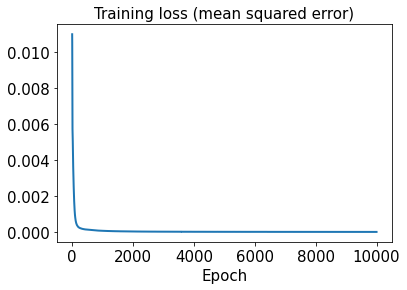

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

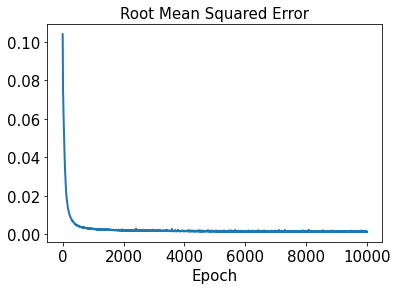

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 2ms/step - loss: 1.8578e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00038099868


In [54]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.010403566


In [55]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00023672356, 0.0002883962, 0.00026301484, 0.00012931904, 0.0005819856, 0.00019432594, 0.00024825227, 0.00031818546, 0.00032035768, 0.0006463259, 0.001136871, 0.00024751655, 0.00033777166, 0.00052577414, 0.00044551076, 0.00037119316, 0.00017919274, 0.0001850146, 0.00028172342, 0.0005956836, 0.00023264973, 0.00034377456, 0.0002776596, 0.0022542235, 0.0001971287, 0.00037245668, 0.0010633644, 0.00040077305, 0.00029131025, 0.00044302572, 0.00055971084, 0.00043425307, 0.00016516485, 0.0004356551, 0.0005257171, 0.00014192799, 0.0003993542, 0.00051820464, 9.743466e-05, 0.0003653945, 0.0003012094, 0.000529686, 0.0003331735, 0.00021690663, 0.00044566026, 0.00012462304, 0.0004915436, 0.0001557615, 0.00013055676, 0.0002268104, 0.0002740712, 0.00019119596, 0.00014721796, 0.00030726404, 0.00034043012, 0.00014088654, 0.00018747435, 0.0005561, 0.00046544446, 0.00034928322, 0.0001458584, 0.0004721871, 0.00016850076, 0.00026215037, 0.00016397554, 0.0007261438, 0.0001854512, 0.00065716467, 0.000272080

In [56]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.023438264, 0.0009259609, 0.00045393695, 0.0011711733, 0.0009589918, 0.026886951, 0.03805234, 0.0007796755, 0.0009466688, 0.00047798082, 0.09744944, 0.002137664, 0.0036232148, 0.00050946133, 0.0005600016, 0.005091134, 0.00078129023, 0.0019222088, 0.14831804, 0.00044880068, 0.0033110275, 0.00060337334, 0.0005857096, 0.0010998386, 0.00033363013, 0.0015628389, 0.0016911605, 0.014425762, 0.00074258586, 0.00064233504, 0.00034986276, 0.024698151, 0.00082999386, 0.00068574597, 0.00060651876, 0.012113156, 0.0006786862, 0.0011418991, 0.0058328956, 0.0017324847, 0.0011068054, 0.0014850468, 0.00071956817, 0.0015039121]


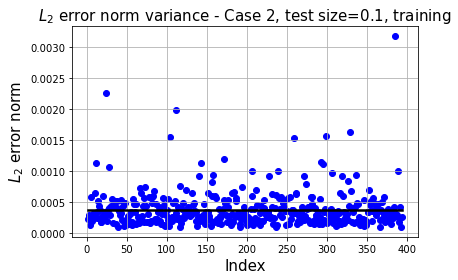

In [57]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

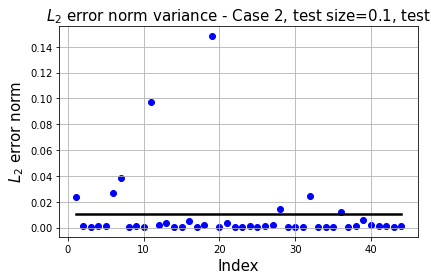

In [58]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

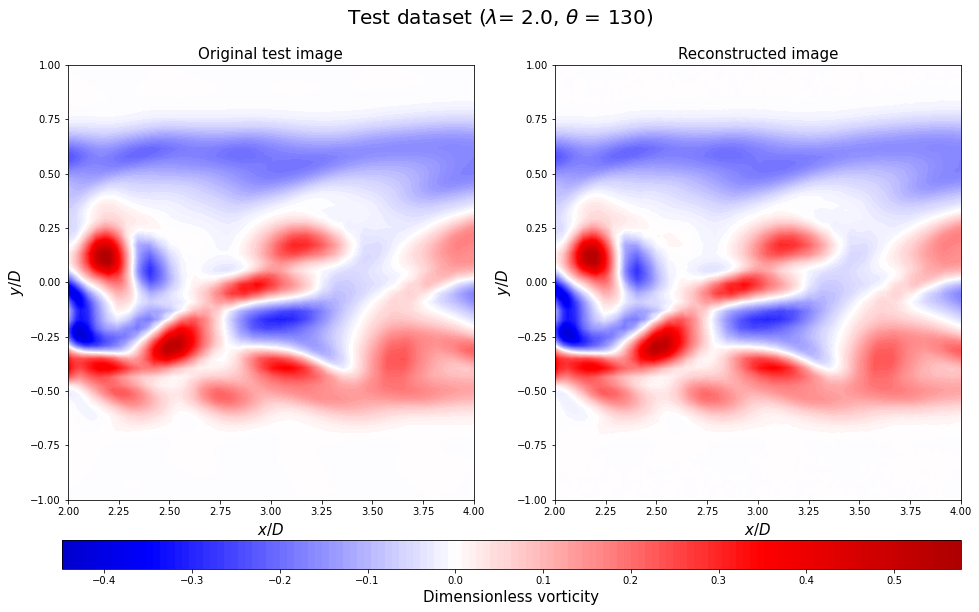

In [59]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

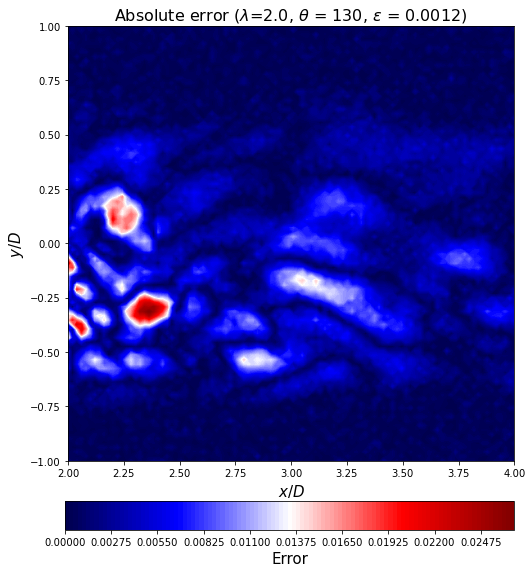

In [60]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()